#DATA PREPROCESSING

#Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from scipy.special import inv_boxcox1p
from IPython.display import FileLink
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout ,Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from pandas.plotting import parallel_coordinates
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

import warnings





In [2]:
df=pd.read_csv("WSN-DS.csv")   #read the data

In [3]:
df.columns = df.columns.str.strip()   #rename the columns so there will be no spaces
df

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal


In [4]:
df_select = df[['Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Attack type' , 'Consumed Energy']]


In [5]:
missing_values =df_select.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Is_CH              0
ADV_S              0
ADV_R              0
SCH_S              0
SCH_R              0
DATA_S             0
DATA_R             0
Data_Sent_To_BS    0
Attack type        0
Consumed Energy    0
dtype: int64


In [6]:
df_select.columns

Index(['Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R',
       'Data_Sent_To_BS', 'Attack type', 'Consumed Energy'],
      dtype='object')

In [7]:
df_select.shape

(374661, 10)

In [8]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Is_CH            374661 non-null  int64  
 1   ADV_S            374661 non-null  int64  
 2   ADV_R            374661 non-null  int64  
 3   SCH_S            374661 non-null  int64  
 4   SCH_R            374661 non-null  int64  
 5   DATA_S           374661 non-null  int64  
 6   DATA_R           374661 non-null  int64  
 7   Data_Sent_To_BS  374661 non-null  int64  
 8   Attack type      374661 non-null  object 
 9   Consumed Energy  374661 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 28.6+ MB


In [9]:
df_select.head()

,Is_CH,ADV_S,ADV_R,SCH_S,SCH_R,DATA_S,DATA_R,Data_Sent_To_BS,Attack type,Consumed Energy
0,1,1,0,1,0,0,1200,48,Normal,2.46940
1,0,0,4,0,1,38,0,0,Normal,0.06957
2,0,0,4,0,1,41,0,0,Normal,0.06898
3,0,0,4,0,1,38,0,0,Normal,0.06673
4,0,0,4,0,1,41,0,0,Normal,0.06534


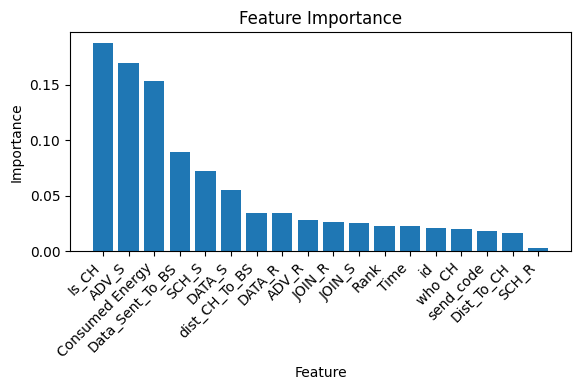

In [10]:
#Feature Selection Using Randomforest Model

target_column = 'Attack type'


X = df.drop(target_column, axis=1)
y = df[target_column]

# Ensure that X contains only numeric columns
X_numeric = X.select_dtypes(include=['number'])


X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using a bar chart
plt.figure(figsize=(6,4))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [11]:
# Feature selection using Information Gain
target_column = 'Attack type'

# Convert the target column to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df[target_column])

# Split the data into features (X) and the target variable (y)
X = df.drop(target_column, axis=1)
X_numeric = X.select_dtypes(include=['number'])

# Calculate information gain for each feature
information_gain = mutual_info_classif(X_numeric, y_encoded)

# Create a DataFrame to store feature names and their information gain scores
information_gain_df = pd.DataFrame({'Feature': X_numeric.columns, 'Information Gain': information_gain})

# Sort the DataFrame by information gain in descending order
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)

# Display selected features based on information gain
selected_features_info_gain = information_gain_df.head(10)['Feature'].tolist()
print("Selected Features based on Information Gain:")
print(selected_features_info_gain)


Selected Features based on Information Gain:
['ADV_S', 'Consumed Energy', 'Is_CH', 'JOIN_S', 'SCH_R', 'DATA_S', 'Rank', 'send_code', 'Dist_To_CH', 'ADV_R']


In [12]:
information_gain_df.head(10)

,Feature,Information Gain
5,ADV_S,0.271689
17,Consumed Energy,0.243304
2,Is_CH,0.242486
7,JOIN_S,0.233198
10,SCH_R,0.203818
12,DATA_S,0.192712
11,Rank,0.164346
16,send_code,0.159945
4,Dist_To_CH,0.151737
6,ADV_R,0.132523


#STUDYING THE DATA

##EDA

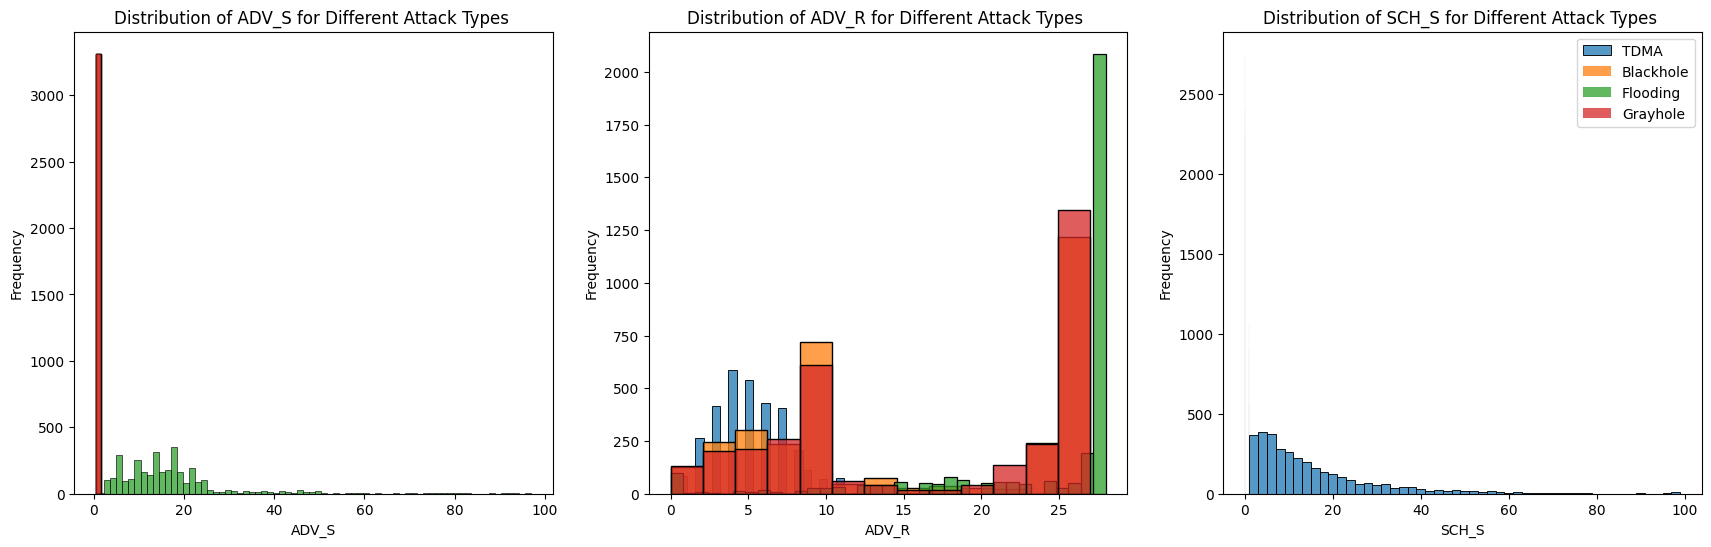

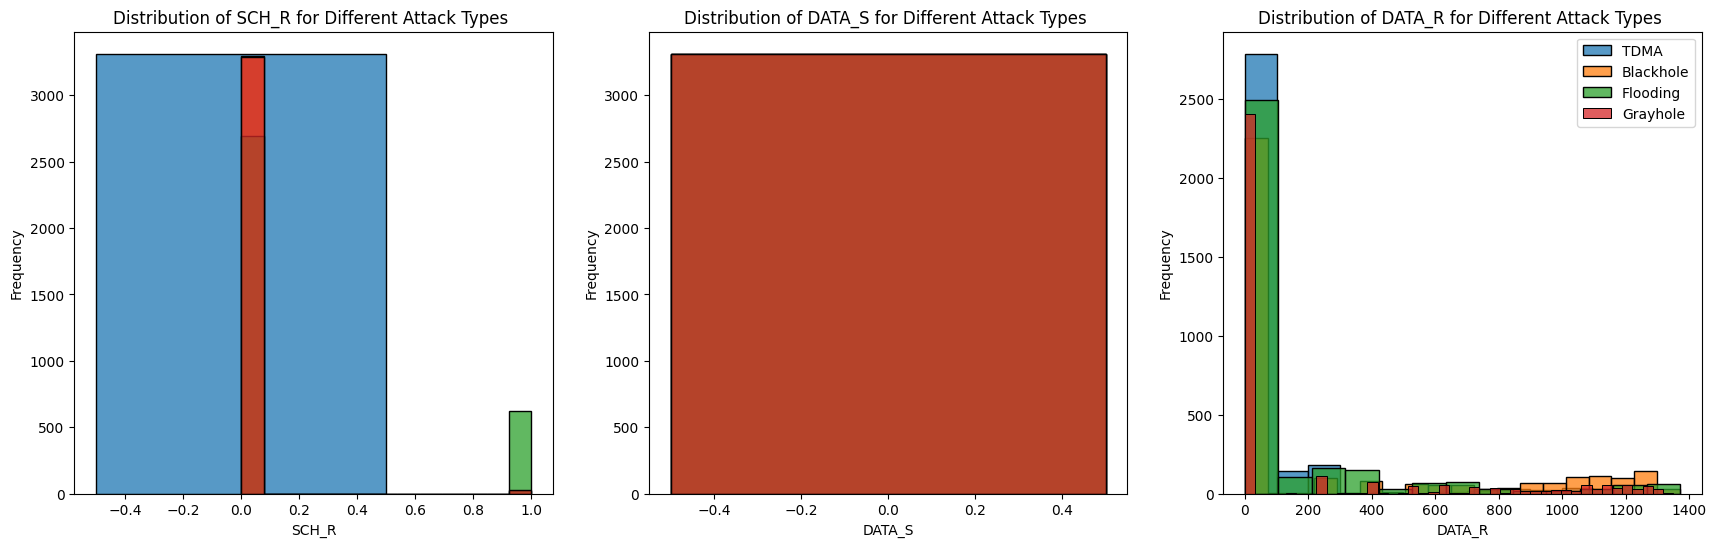

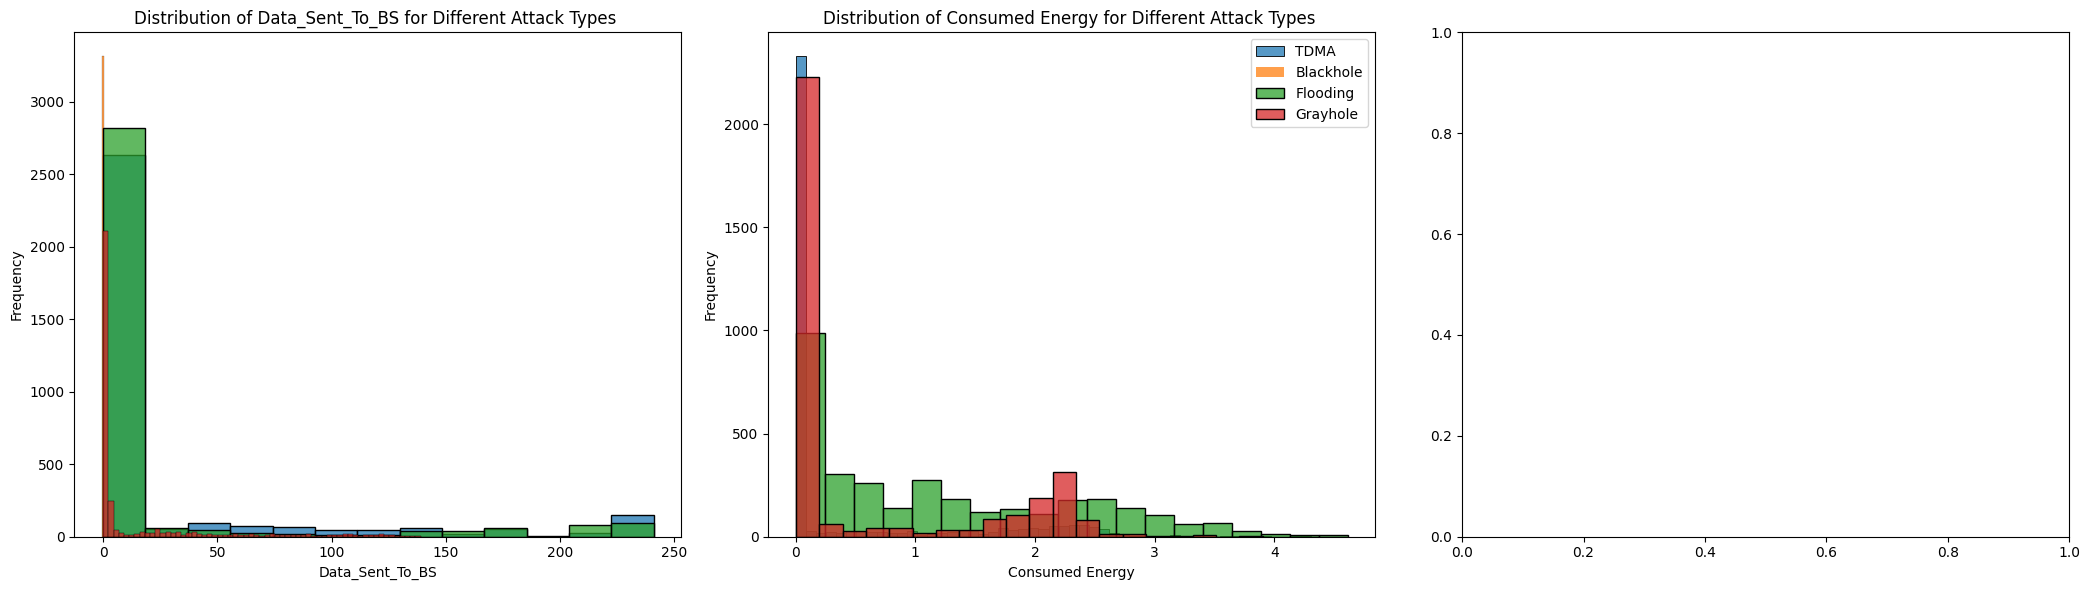

In [13]:
'''A visual overview of the distribution of our features across different types of  attacks. This type
 of analysis can help in understanding the characteristics of the data and identifying potential patterns or anomalies associated with different attack types.'''
# Ignore future and user warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


df_select1 = df[[ 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy', 'Attack type']]
attack_types = ['TDMA', 'Blackhole', 'Flooding', 'Grayhole']

# number of plots per row
plots_per_row = 3

# Number of observations to include for each attack type
observations_per_attack_type = 3312

# Loop through each feature and create plots for each 'Attack type'
for i, feature in enumerate(df_select1.columns[:-1]):  # Exclude the last column ('Attack type')
    if i % plots_per_row == 0:
        fig, axes = plt.subplots(1, plots_per_row, figsize=(21, 6))
    for j, attack_type in enumerate(attack_types):
        # Filter the data for the specified number of observations for each attack type
        subset_data = df_select1[df_select1['Attack type'] == attack_type].head(observations_per_attack_type)
        sns.histplot(subset_data[feature], label=attack_type, kde=False, ax=axes[i % plots_per_row])
    axes[i % plots_per_row].set_title(f'Distribution of {feature} for Different Attack Types ')
    axes[i % plots_per_row].set_xlabel(feature)
    axes[i % plots_per_row].set_ylabel('Frequency')
    if i % plots_per_row == plots_per_row - 1 or i == len(df_select1.columns[:-1]) - 1:
        # If it's the last plot in the row or the last overall, show legend
        axes[i % plots_per_row].legend()

# Ensure tight layout for the last row
plt.tight_layout()
plt.show()


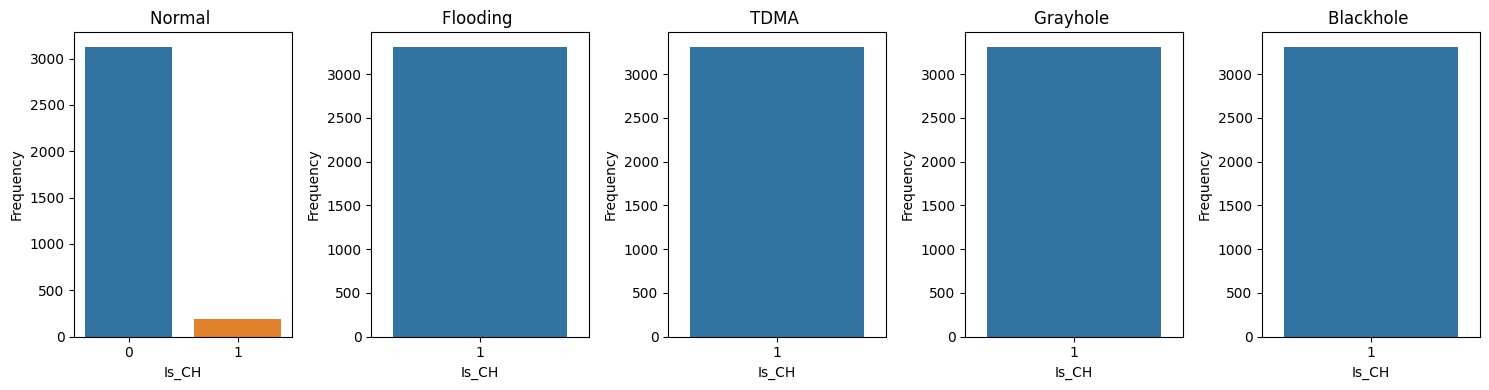

In [14]:
#how the  feature 'Is_CH' is distributed across different categories of network attacks
# to understand the distribution of 'Is_CH' in the context of different attack scenarios.

warnings.simplefilter(action='ignore', category=FutureWarning)                  #to delete unwanted messages that comes with the output
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312                                                     #3312 sample from each attack to compare between balanced features

# Set up subplots
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))

# Plot the distribution of 'Is_CH' for each category in 'Attack type'
for i, attack_type in enumerate(df['Attack type'].unique()):
    # Filter the data for the specified number of samples for each category
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)

    # Plot count plot
    sns.countplot(x='Is_CH', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('Is_CH')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


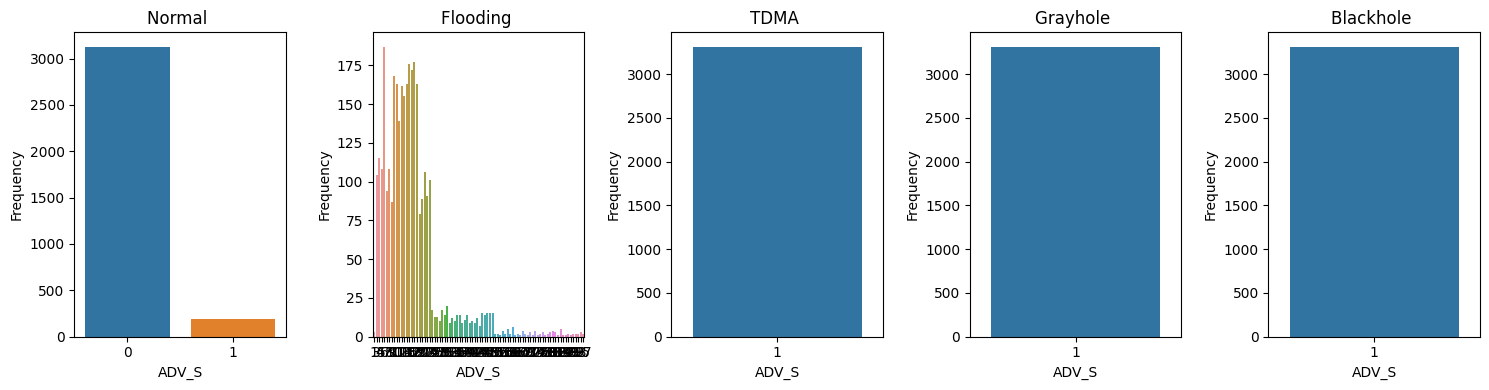

In [15]:
#how the  feature 'ADV_S' is distributed across different categories of network attacks
# to understand the distribution of 'ADV_S' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='ADV_S', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('ADV_S')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


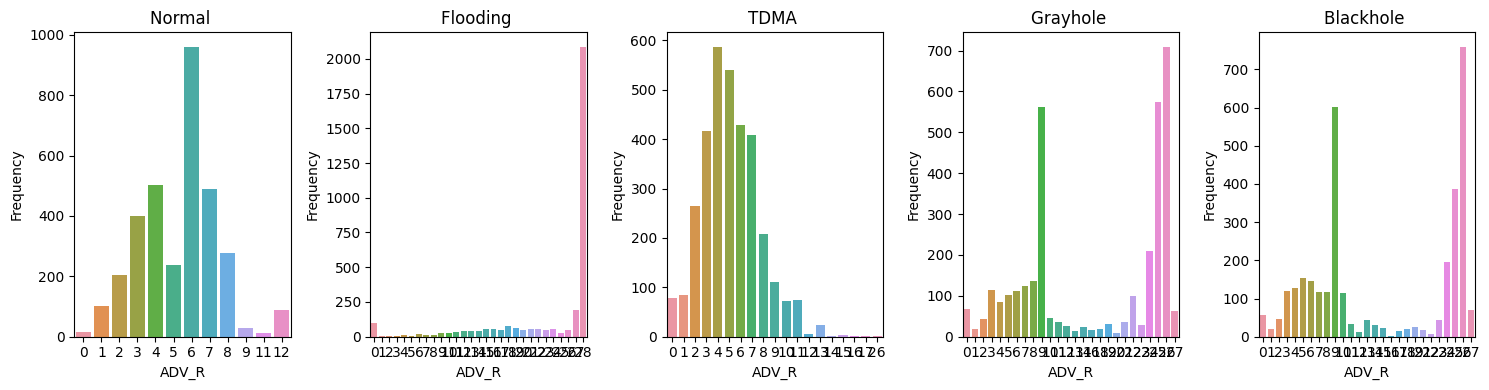

In [16]:
#how the  feature 'ADV_R' is distributed across different categories of network attacks
# to understand the distribution of 'ADV_R' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='ADV_R', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('ADV_R')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


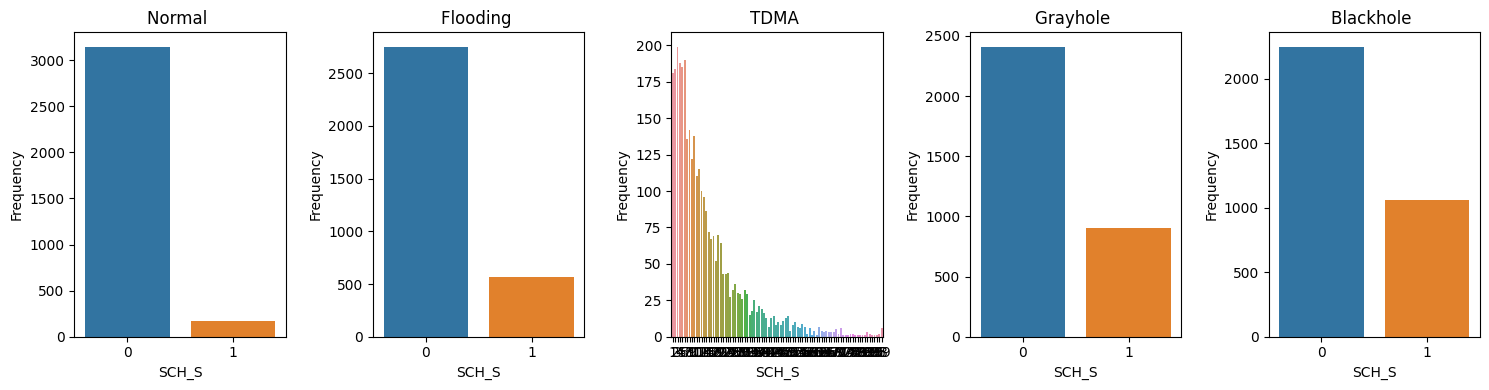

In [17]:
#how the  feature 'SCH_S' is distributed across different categories of network attacks
# to understand the distribution of 'SCH_S' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='SCH_S', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('SCH_S')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


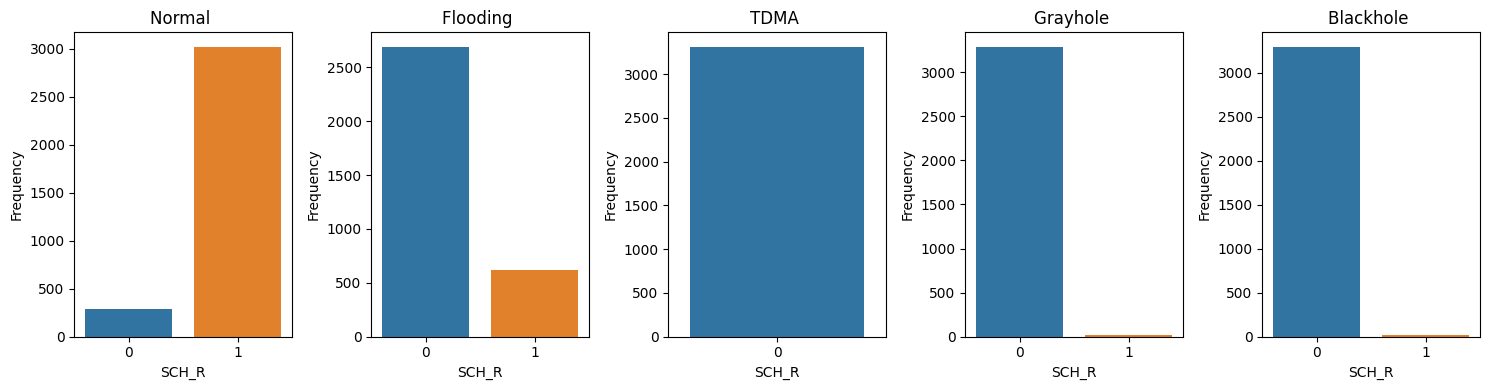

In [18]:
#how the  feature 'SCH_R' is distributed across different categories of network attacks
# to understand the distribution of 'SCH_R' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='SCH_R', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('SCH_R')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


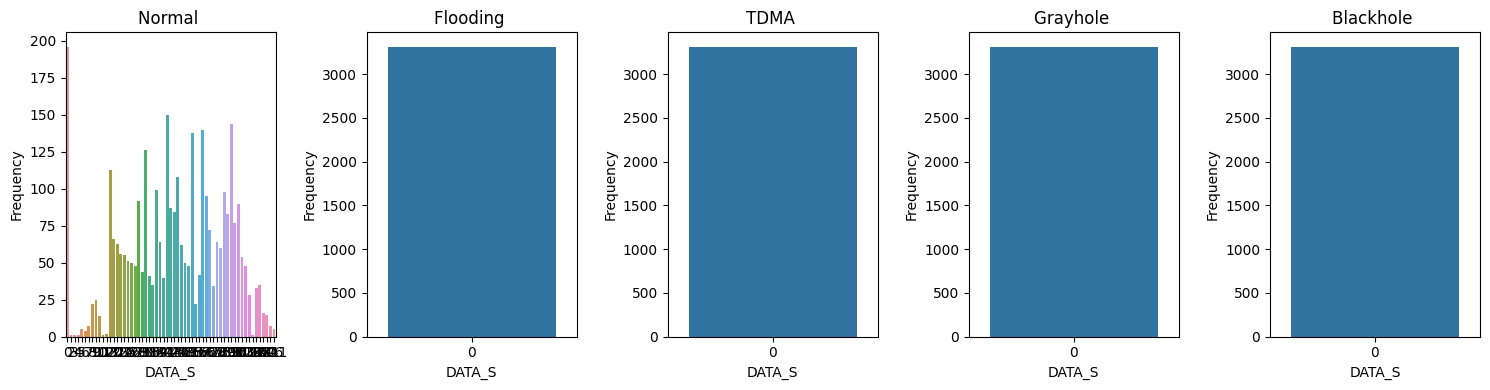

In [19]:
#how the  feature 'DATA_S' is distributed across different categories of network attacks
# to understand the distribution of 'DATA_S' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='DATA_S', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('DATA_S')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


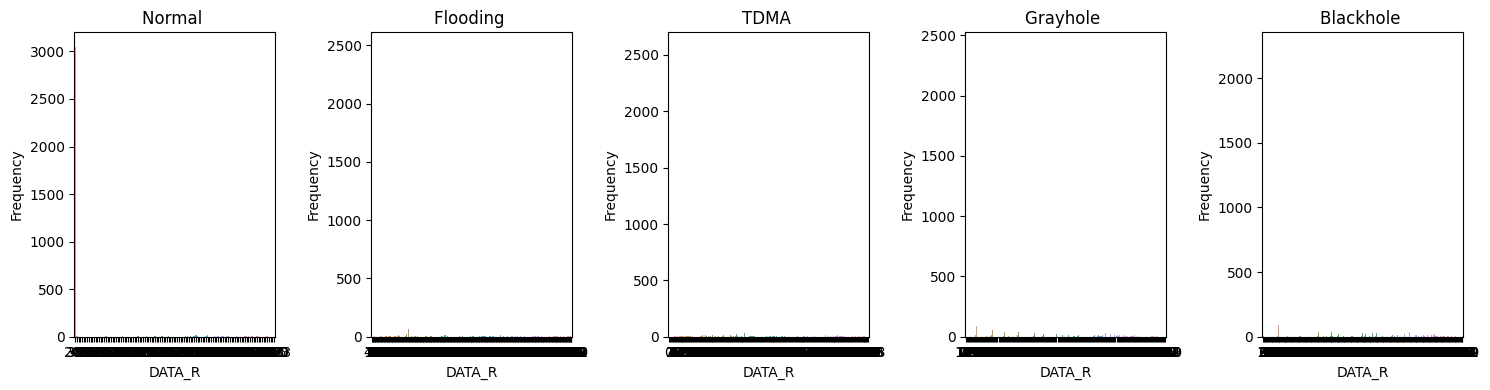

In [20]:
#how the  feature 'DATA_R' is distributed across different categories of network attacks
# to understand the distribution of 'DATA_R' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x='DATA_R', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('DATA_R')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


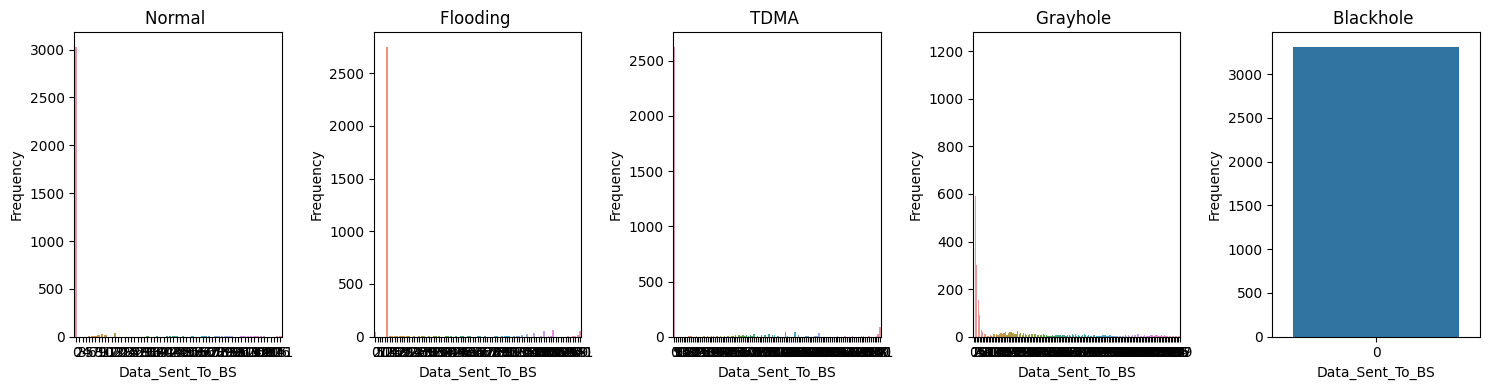

In [21]:
#how the  feature 'Data_Sent_To_BS' is distributed across different categories of network attacks
# to understand the distribution of 'Data_Sent_To_BS' in the context of different attack scenarios.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
samples_per_category = 3312
fig, axes = plt.subplots(1, len(df['Attack type'].unique()), figsize=(15, 4))
for i, attack_type in enumerate(df['Attack type'].unique()):
    subset_data = df[df['Attack type'] == attack_type].head(samples_per_category)
    sns.countplot(x= 'Data_Sent_To_BS', data=subset_data, ax=axes[i])
    axes[i].set_title(f'{attack_type} ')
    axes[i].set_xlabel('Data_Sent_To_BS')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


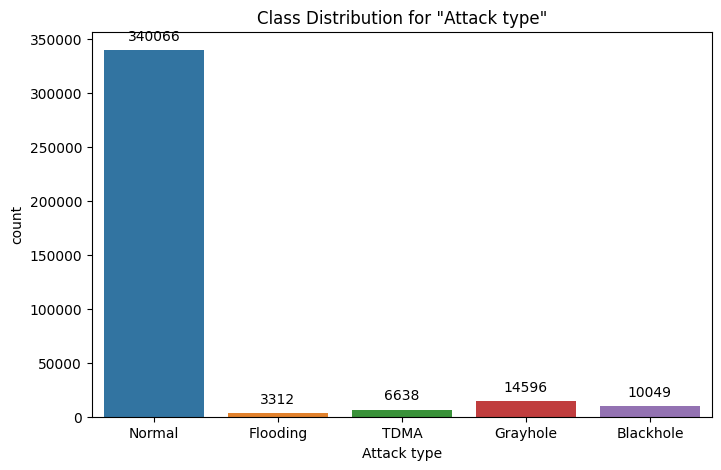

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Attack type', data=df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class Distribution for "Attack type"')
plt.show()


In [23]:
#the probability that the majority of attacks are in  cluster head Is_CH=1
count_attack_ch_1 = df[(df['Attack type'].isin(['TDMA', 'Blackhole', 'Flooding', 'Grayhole'])) & (df['Is_CH'] == 1)].shape[0]
count_attack_ch_0 = df[(df['Attack type'].isin(['TDMA', 'Blackhole', 'Flooding', 'Grayhole'])) & (df['Is_CH'] == 0)].shape[0]
count_ch_0 = df[df['Is_CH'] == 0].shape[0]
count_ch_1 = df[df['Is_CH'] == 1].shape[0]
total_attacks = df[df['Attack type'].isin(['TDMA', 'Blackhole', 'Flooding', 'Grayhole'])].shape[0]

prob_attack_ch_0 = count_attack_ch_0 / total_attacks
prob_attack_ch_1 = count_attack_ch_1 / total_attacks
prob_ch_0 = count_ch_0 / df.shape[0]
prob_ch_1 = count_ch_1 / df.shape[0]

print(f'Total number of attacks: {total_attacks}')
print(f'Number of records with Attack and Is_CH=0: {count_attack_ch_0}, Probability: {prob_attack_ch_0:.2%}')
print(f'Number of records with Attack and Is_CH=1: {count_attack_ch_1}, Probability: {prob_attack_ch_1:.2%}')
print(f'Number of records with Is_CH=0: {count_ch_0}, Probability: {prob_ch_0:.2%}')
print(f'Number of records with Is_CH=1: {count_ch_1}, Probability: {prob_ch_1:.2%}')


Total number of attacks: 34595
Number of records with Attack and Is_CH=0: 423, Probability: 1.22%
Number of records with Attack and Is_CH=1: 34172, Probability: 98.78%
Number of records with Is_CH=0: 331288, Probability: 88.42%
Number of records with Is_CH=1: 43373, Probability: 11.58%


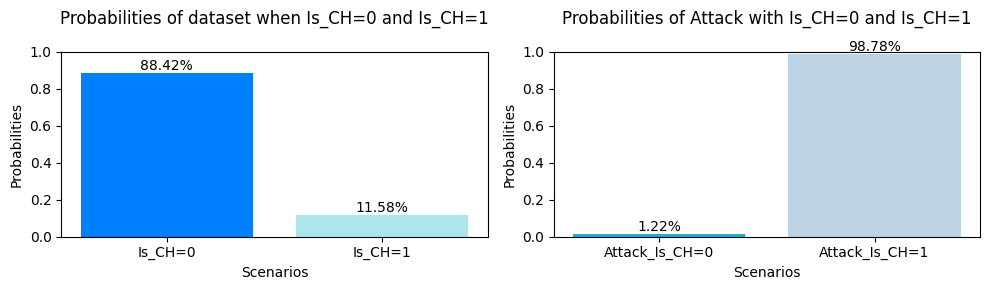

In [24]:
labels = ['Attack_Is_CH=0', 'Attack_Is_CH=1', 'Is_CH=0', 'Is_CH=1']
probabilities = [prob_attack_ch_0, prob_attack_ch_1, prob_ch_0, prob_ch_1]
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
bars1 = axes[0].bar(labels[2:], probabilities[2:], color=['#007fff', '#ace5ee'])
axes[0].set_title('Probabilities of dataset when Is_CH=0 and Is_CH=1', pad=20)
axes[0].set_xlabel('Scenarios')
axes[0].set_ylabel('Probabilities')
axes[0].set_ylim(0, 1)


for bar, prob in zip(bars1, probabilities[2:]):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{prob:.2%}', ha='center', va='bottom')


bars2 = axes[1].bar(labels[:2], probabilities[:2], color=['#21abcd', '#bcd4e6'])
axes[1].set_title('Probabilities of Attack with Is_CH=0 and Is_CH=1', pad=20)
axes[1].set_xlabel('Scenarios')
axes[1].set_ylabel('Probabilities')
axes[1].set_ylim(0, 1)


for bar, prob in zip(bars2, probabilities[:2]):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{prob:.2%}', ha='center', va='bottom')


plt.tight_layout()
plt.show()


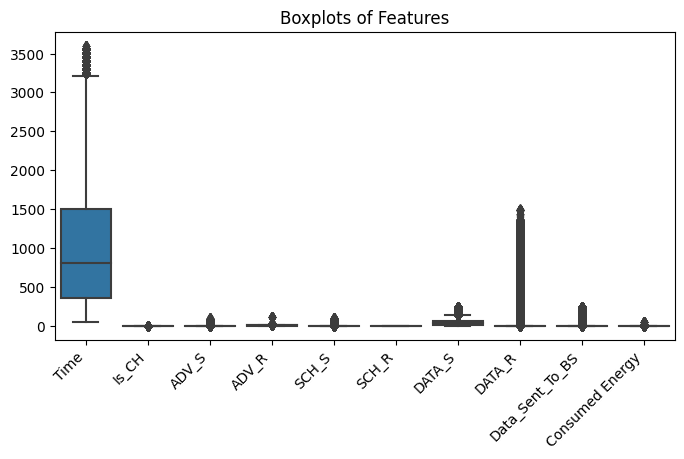

In [25]:
features = ['Time', 'Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy']

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[features])
plt.title('Boxplots of Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [26]:
#Handling outliers
# Create a copy of the DataFrame to avoid modifying the original
df_select_copy = df_select.copy()

# Calculate Z-scores for all features except 'Attack type'
numeric_columns = df_select_copy.columns.difference(['Attack type'])
df_select_copy[numeric_columns] = zscore(df_select_copy[numeric_columns])

# Define a threshold for outliers
threshold = 3

# Find and count the number of outliers and non-outliers for each feature
outliers_counts = (df_select_copy[numeric_columns] > threshold).sum()
non_outliers_counts = (df_select_copy[numeric_columns] <= threshold).sum()

# Print the results
print("Number of outliers for each feature:")
print(outliers_counts)

print("\nNumber of non-outliers for each feature:")
print(non_outliers_counts)


Number of outliers for each feature:
ADV_R                 41
ADV_S               3065
Consumed Energy     6974
DATA_R             14858
DATA_S              7536
Data_Sent_To_BS     6700
Is_CH                  0
SCH_R                  0
SCH_S               3651
dtype: int64

Number of non-outliers for each feature:
ADV_R              374620
ADV_S              371596
Consumed Energy    367687
DATA_R             359803
DATA_S             367125
Data_Sent_To_BS    367961
Is_CH              374661
SCH_R              374661
SCH_S              371010
dtype: int64


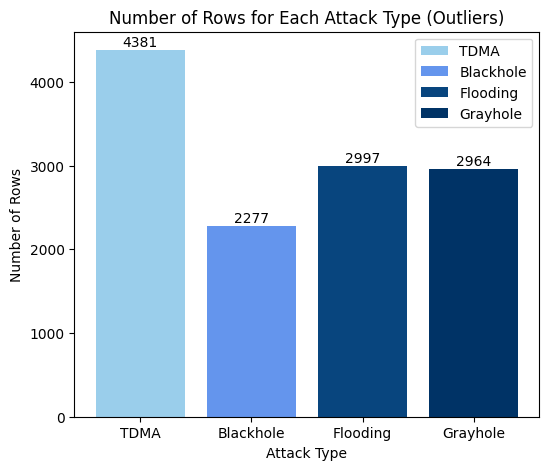

4381 observation have outlier/s and classified to be TDMA
2277 observation have outlier/s and classified to be Blackhole
2997 observation have outlier/s and classified to be Flooding
2964 observation have outlier/s and classified to be Grayhole


In [27]:
#handling outliers
# Calculate Z-scores for numeric columns
df_select_copy[numeric_columns] = zscore(df_select_copy[numeric_columns])

# Define a threshold for outliers
threshold = 3

# Identify outliers
outliers_indices = (df_select_copy[numeric_columns] > threshold).any(axis=1)
df_select_copy['Outliers'] = outliers_indices

# Specify attack types
attack_types = ['TDMA', 'Blackhole', 'Flooding', 'Grayhole']

# Specify colors for each attack type
colors = ['#9aceeb', '#6495ed', '#08457e', '#003366']

# Create a bar plot for the shape of rows where an attack type is observed and it is an outlier
fig, ax = plt.subplots(figsize=(6, 5))

for i, attack_type in enumerate(attack_types):
    attack_rows = df_select_copy[df_select_copy['Attack type'] == attack_type]
    outlier_attack_rows = attack_rows[attack_rows['Outliers']]

    # Plot the bar with specified color
    bar = ax.bar(attack_type, outlier_attack_rows.shape[0], label=attack_type, color=colors[i])

    # Display the number of rows above each bar
    for rect in bar:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{height}', ha='center', va='bottom')

ax.set_xlabel('Attack Type')
ax.set_ylabel('Number of Rows')
ax.set_title('Number of Rows for Each Attack Type (Outliers)')
ax.legend()
plt.show()

print('4381 observation have outlier/s and classified to be TDMA')
print('2277 observation have outlier/s and classified to be Blackhole')
print('2997 observation have outlier/s and classified to be Flooding')
print('2964 observation have outlier/s and classified to be Grayhole')
# OUTLIERS WAS IMPORTANT FOR US TO DETECT DIFFERENT Dos ATTACKS

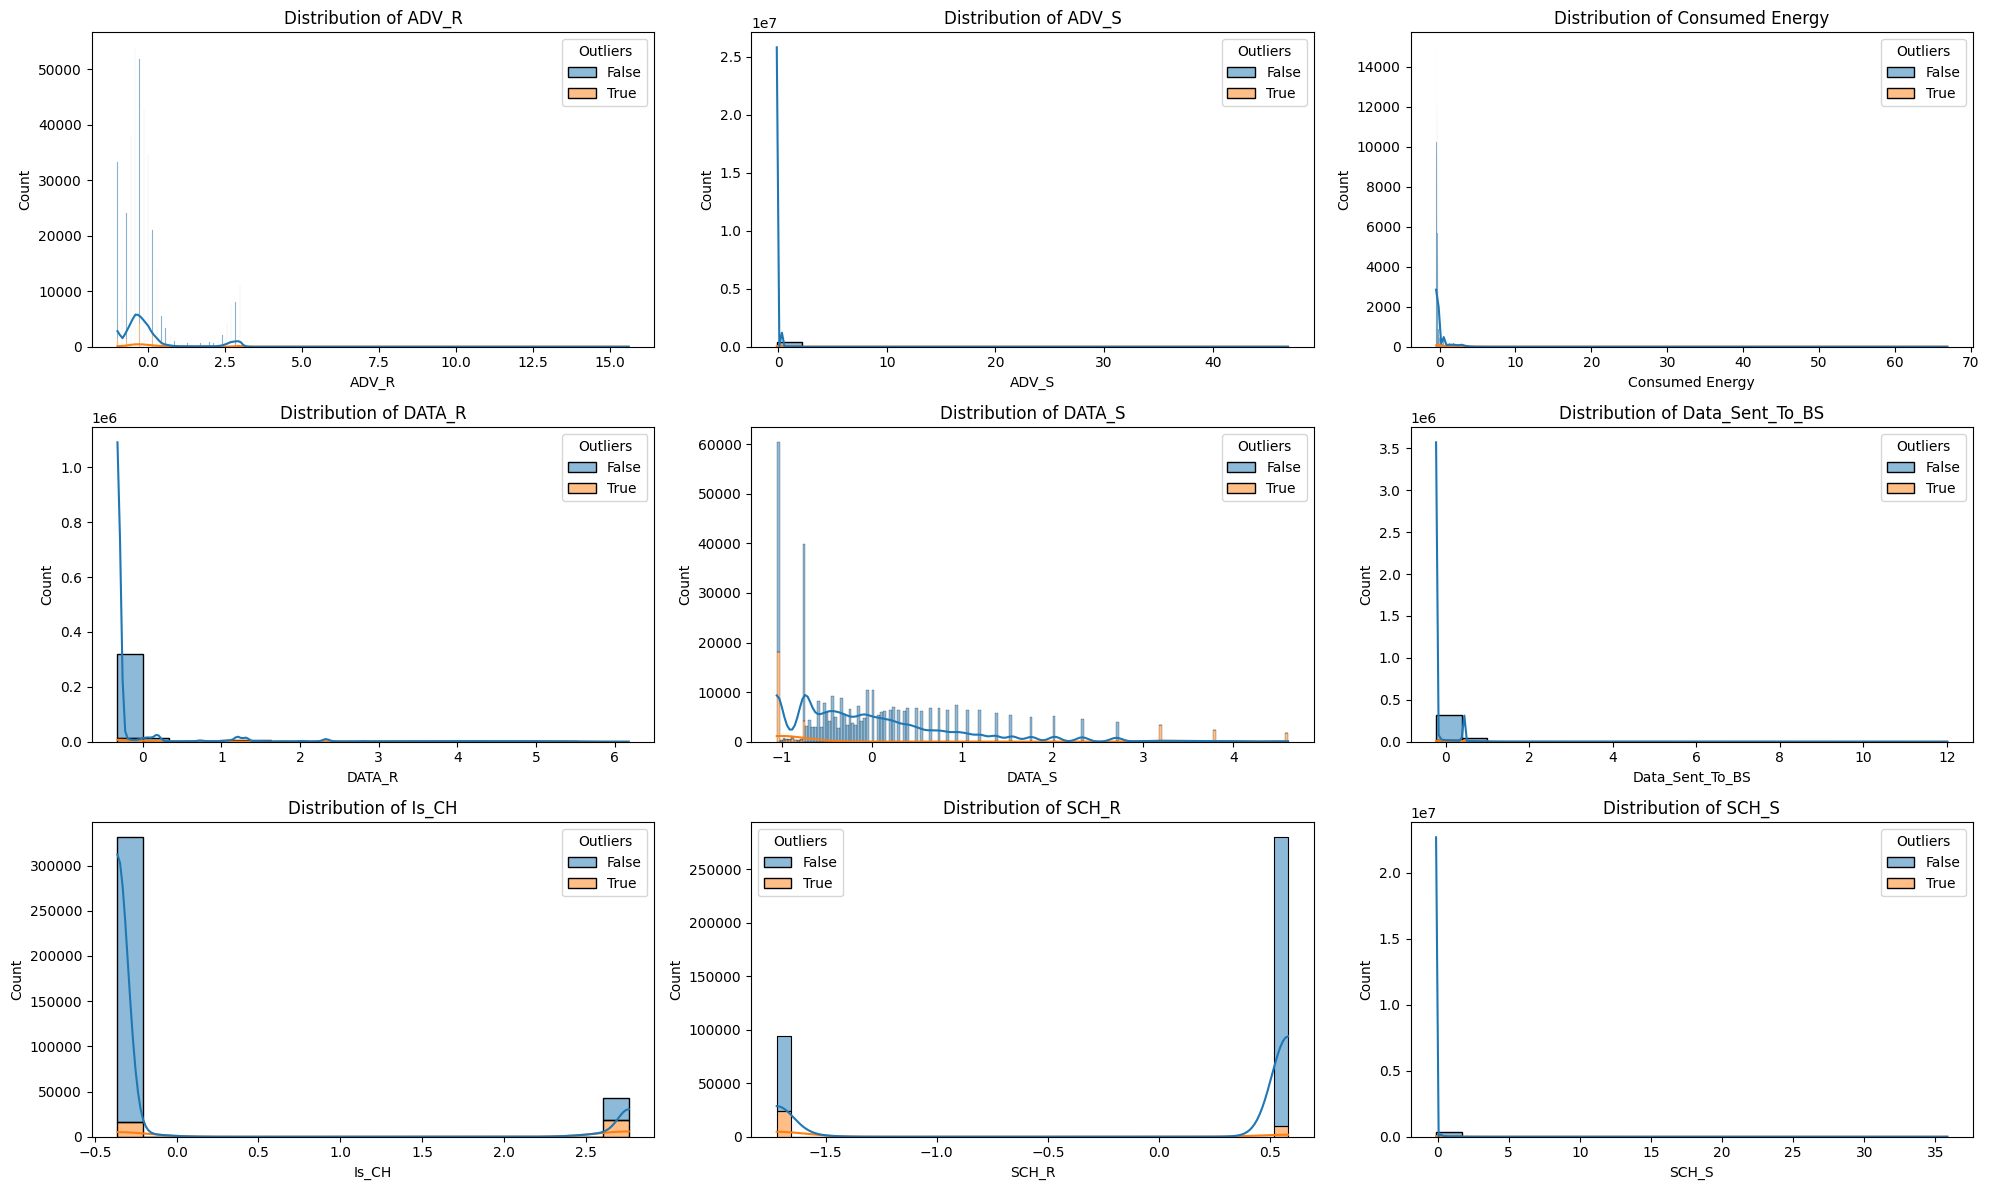

In [28]:
#the distribution differences between outliers and non-outliers for each numeric feature.

# Convert binary columns to numeric
binary_columns = ['Is_CH', 'SCH_R']
df_select_copy[binary_columns] = df_select_copy[binary_columns].astype('int')

# Identify numeric columns (excluding 'Attack type')
numeric_columns = df_select.select_dtypes(include='number').columns.difference(['Attack type'])

# Calculate Z-scores for numeric columns
df_select_copy[numeric_columns] = zscore(df_select[numeric_columns])

# Define a threshold for outliers
threshold = 3

# Identify outliers
outliers_indices = (df_select_copy[numeric_columns] > threshold).any(axis=1)
df_select_copy['Outliers'] = outliers_indices

# Set up subplots with 3 columns per row
num_plots = len(numeric_columns)
num_rows = (num_plots + 2) // 3  # Round up to the nearest multiple of 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 4 * num_rows))

# Plot the distribution of outliers and non-outliers for each feature
for i, col in enumerate(numeric_columns):
    row_idx = i // 3
    col_idx = i % 3
    sns.histplot(data=df_select_copy, x=col, hue='Outliers', multiple='stack', kde=True, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {col}')

# Remove empty subplots
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


##STUDYING THE FEATURES TO DECIDE THE BEST SCALING METHOD

In [29]:
# Display the number of unique values for each feature
for feature in features:
    unique_values = df[feature].nunique()
    print(f'{feature}: {unique_values} unique values')


Time: 196 unique values
Is_CH: 2 unique values
ADV_S: 85 unique values
ADV_R: 31 unique values
SCH_S: 95 unique values
SCH_R: 2 unique values
DATA_S: 192 unique values
DATA_R: 1345 unique values
Data_Sent_To_BS: 237 unique values
Consumed Energy: 69352 unique values


In [30]:
# Print at most 10 unique values for each feature
for col in df_select.columns:
    unique_values = df_select[col].unique()[:10]
    print(f"Unique values for {col}:")
    print(unique_values.tolist())
    if len(df_select[col].unique()) > 10:
        print("etc")
    print()


Unique values for Is_CH:
[1, 0]

Unique values for ADV_S:
[1, 0, 7, 6, 4, 8, 3, 9, 5, 16]
etc

Unique values for ADV_R:
[0, 4, 2, 1, 3, 7, 6, 5, 12, 11]
etc

Unique values for SCH_S:
[1, 0, 89, 42, 20, 43, 64, 63, 17, 29]
etc

Unique values for SCH_R:
[0, 1]

Unique values for DATA_S:
[0, 38, 41, 48, 111, 30, 23, 27, 57, 42]
etc

Unique values for DATA_R:
[1200, 0, 1230, 888, 1254, 1288, 1260, 1140, 1296, 1218]
etc

Unique values for Data_Sent_To_BS:
[48, 0, 41, 111, 38, 23, 30, 57, 27, 42]
etc

Unique values for Attack type:
['Normal', 'Flooding', 'TDMA', 'Grayhole', 'Blackhole']

Unique values for Consumed Energy:
[2.4694, 0.06957, 0.06898, 0.06673, 0.06534, 0.06717, 0.06214, 0.06662, 0.06649, 0.07903]
etc



In [31]:
def feature_type(df, feature, threshold=10):
    unique_values = df[feature].nunique()

    if unique_values <= threshold:
        return 'Discrete'
    else:
        return 'Continuous'

features = [ 'Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy']
for feature in features:
    print(f'{feature}: {feature_type(df, feature)}')


Is_CH: Discrete
ADV_S: Continuous
ADV_R: Continuous
SCH_S: Continuous
SCH_R: Discrete
DATA_S: Continuous
DATA_R: Continuous
Data_Sent_To_BS: Continuous
Consumed Energy: Continuous


In [32]:
def is_binary(df, feature):
    unique_values = df[feature].unique()

    # If there are only two unique values (0 and 1), it's binary
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        return True
    else:
        return False

# Example usage for your features:
features = [ 'Is_CH', 'ADV_S', 'ADV_R', 'SCH_S', 'SCH_R', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy']
for feature in features:
    print(f'{feature}: {is_binary(df, feature)}')


Is_CH: True
ADV_S: False
ADV_R: False
SCH_S: False
SCH_R: True
DATA_S: False
DATA_R: False
Data_Sent_To_BS: False
Consumed Energy: False


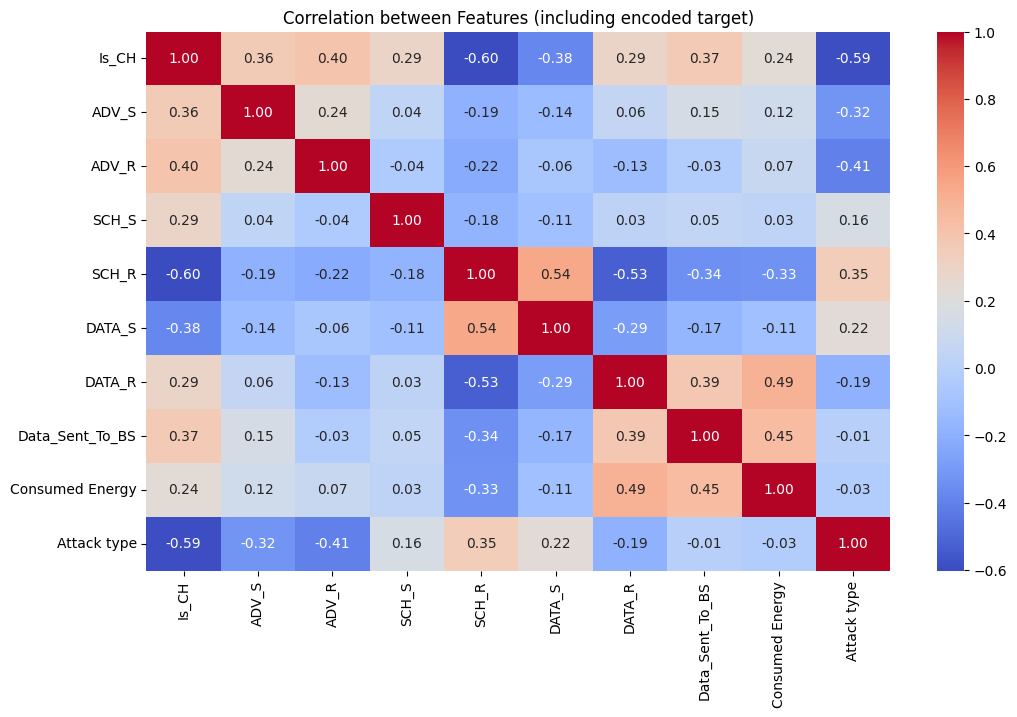

In [33]:
df_encoded = df_select.copy()

# Encode the 'Attack type' column
label_encoder = LabelEncoder()
df_encoded['Attack type'] = label_encoder.fit_transform(df_encoded['Attack type'])

# Reorder columns to place the target variable at the last column
columns_ordered = [col for col in df_encoded.columns if col != 'Attack type'] + ['Attack type']
df_encoded = df_encoded[columns_ordered]

# Plot the correlation matrix
corr_encoded = df_encoded.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr_encoded, annot=True, cmap='coolwarm', fmt=".2f", mask=corr_encoded.isnull())
plt.title("Correlation between Features (including encoded target)")
plt.show()


# flooding_data

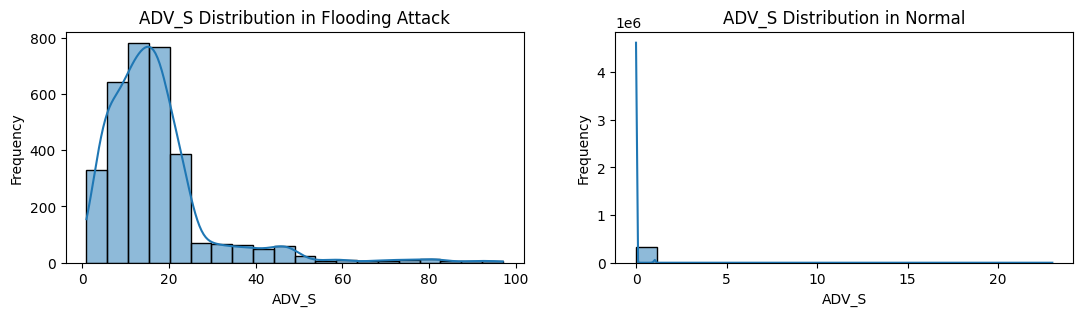

In [34]:
flooding_data = df[df['Attack type'] == 'Flooding']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(flooding_data['ADV_S'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('ADV_S Distribution in Flooding Attack')
axes[0].set_xlabel('ADV_S')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['ADV_S'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('ADV_S Distribution in Normal')
axes[1].set_xlabel('ADV_S')
axes[1].set_ylabel('Frequency')

plt.show()


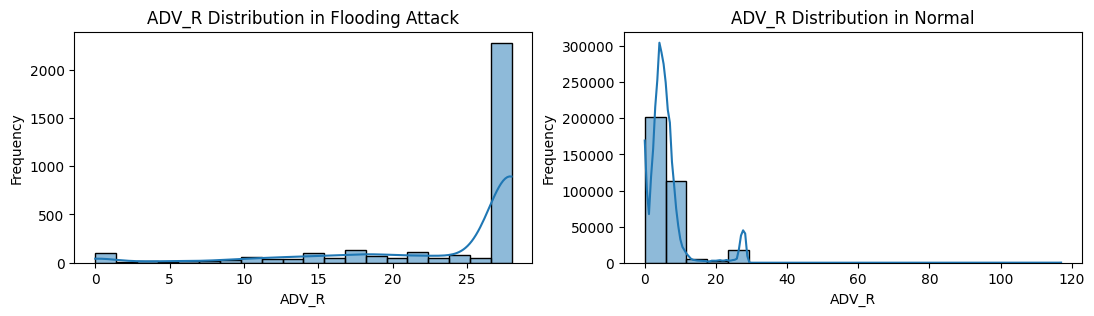

In [35]:
flooding_data = df[df['Attack type'] == 'Flooding']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(flooding_data['ADV_R'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('ADV_R Distribution in Flooding Attack')
axes[0].set_xlabel('ADV_R')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['ADV_R'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('ADV_R Distribution in Normal')
axes[1].set_xlabel('ADV_R')
axes[1].set_ylabel('Frequency')

plt.show()


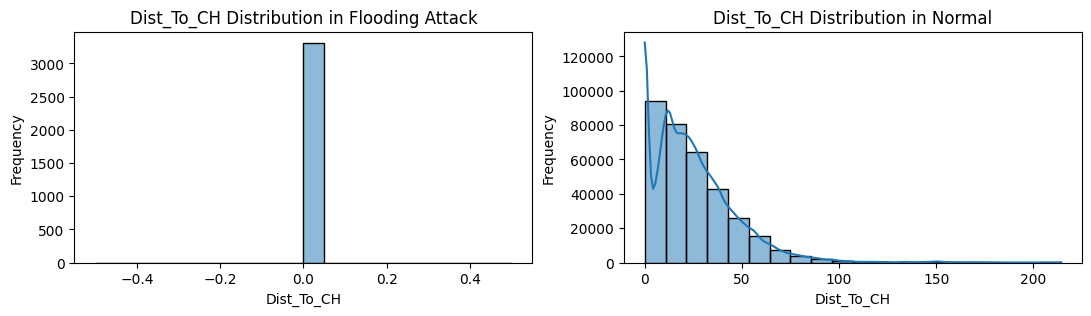

In [36]:
flooding_data = df[df['Attack type'] == 'Flooding']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(flooding_data['Dist_To_CH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Dist_To_CH Distribution in Flooding Attack')
axes[0].set_xlabel('Dist_To_CH')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['Dist_To_CH'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Dist_To_CH Distribution in Normal')
axes[1].set_xlabel('Dist_To_CH')
axes[1].set_ylabel('Frequency')

plt.show()


# blackhole_data

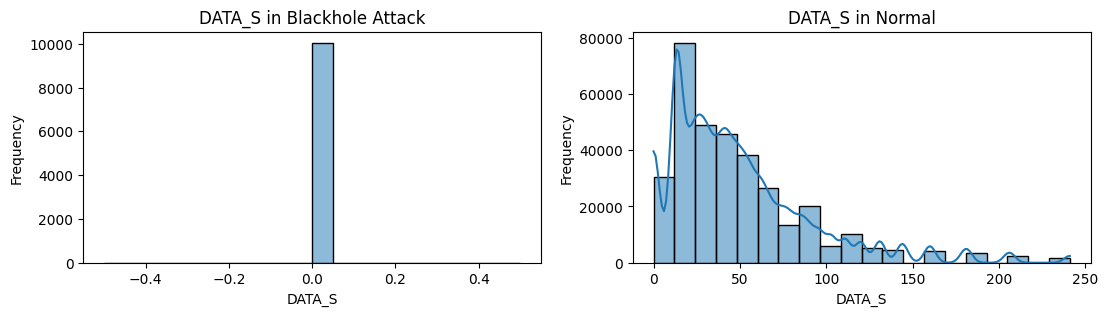

In [37]:
blackhole_data = df[df['Attack type'] == 'Blackhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(blackhole_data['DATA_S'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('DATA_S in Blackhole Attack')
axes[0].set_xlabel('DATA_S')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['DATA_S'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('DATA_S in Normal')
axes[1].set_xlabel('DATA_S')
axes[1].set_ylabel('Frequency')

plt.show()


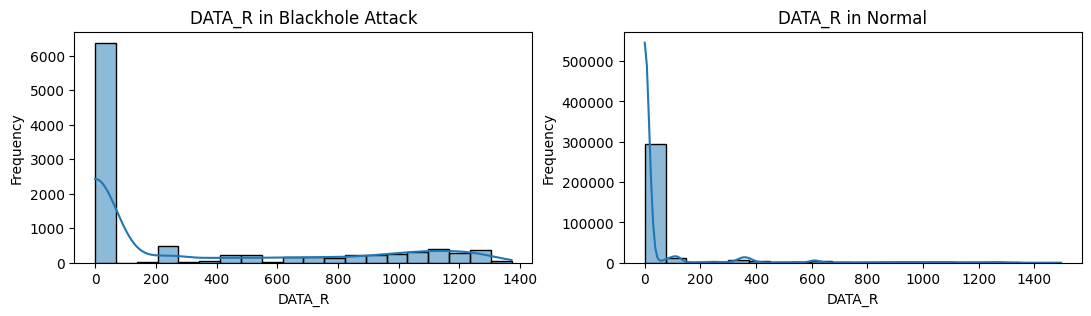

In [38]:
blackhole_data = df[df['Attack type'] == 'Blackhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(blackhole_data['DATA_R'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('DATA_R in Blackhole Attack')
axes[0].set_xlabel('DATA_R')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['DATA_R'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('DATA_R in Normal')
axes[1].set_xlabel('DATA_R')
axes[1].set_ylabel('Frequency')

plt.show()


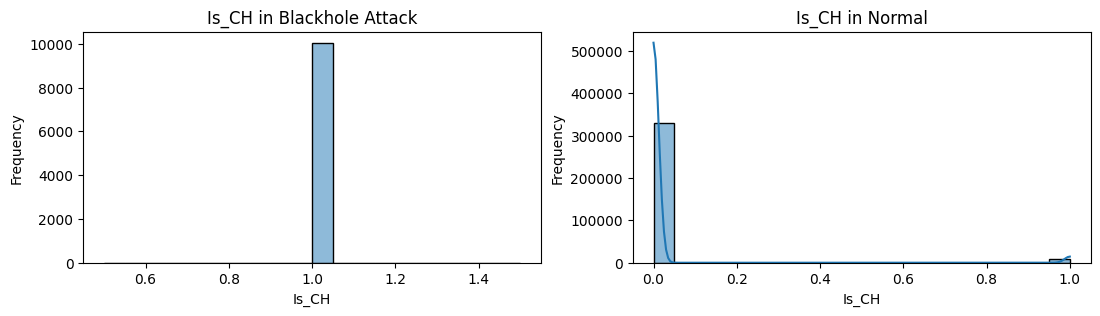

In [39]:
blackhole_data = df[df['Attack type'] == 'Blackhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(blackhole_data['Is_CH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Is_CH in Blackhole Attack')
axes[0].set_xlabel('Is_CH')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['Is_CH'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Is_CH in Normal')
axes[1].set_xlabel('Is_CH')
axes[1].set_ylabel('Frequency')

plt.show()


# Grayhole_data

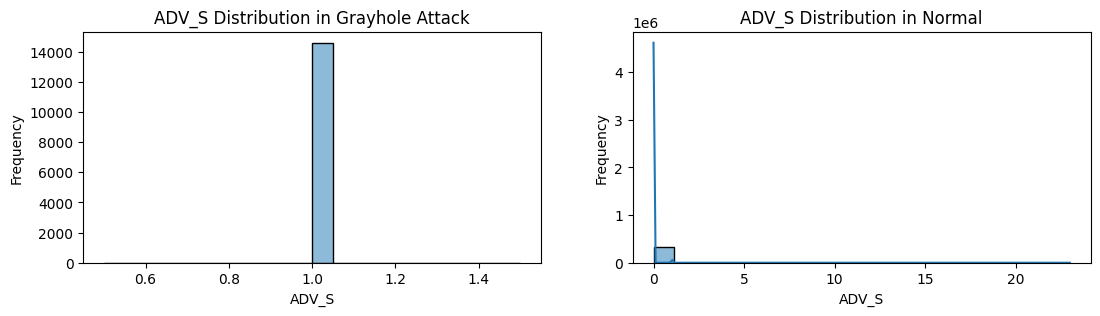

In [40]:
grayhole_data = df[df['Attack type'] == 'Grayhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(grayhole_data['ADV_S'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('ADV_S Distribution in Grayhole Attack')
axes[0].set_xlabel('ADV_S')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['ADV_S'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('ADV_S Distribution in Normal')
axes[1].set_xlabel('ADV_S')
axes[1].set_ylabel('Frequency')

plt.show()


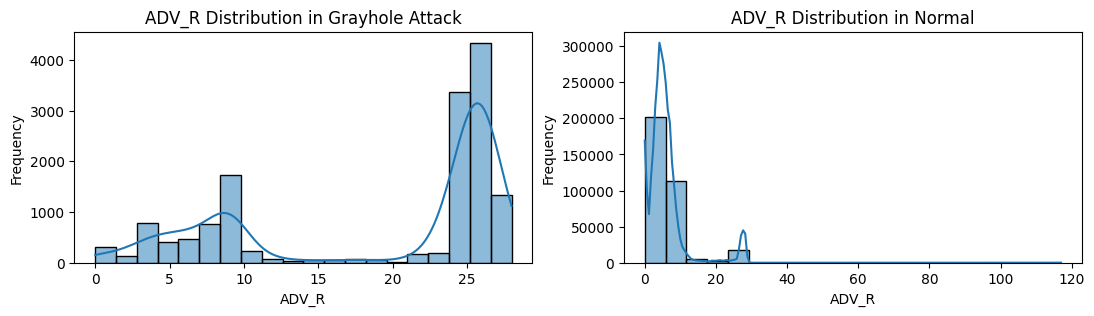

In [41]:
grayhole_data = df[df['Attack type'] == 'Grayhole']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(grayhole_data['ADV_R'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('ADV_R Distribution in Grayhole Attack')
axes[0].set_xlabel('ADV_R')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['ADV_R'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('ADV_R Distribution in Normal')
axes[1].set_xlabel('ADV_R')
axes[1].set_ylabel('Frequency')

plt.show()


# TDMA

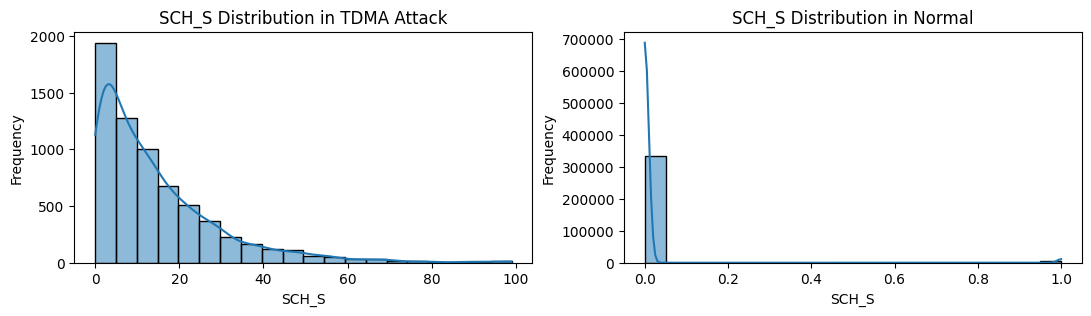

In [42]:
tdma_data = df[df['Attack type'] == 'TDMA']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(tdma_data['SCH_S'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('SCH_S Distribution in TDMA Attack')
axes[0].set_xlabel('SCH_S')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['SCH_S'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('SCH_S Distribution in Normal')
axes[1].set_xlabel('SCH_S')
axes[1].set_ylabel('Frequency')

plt.show()


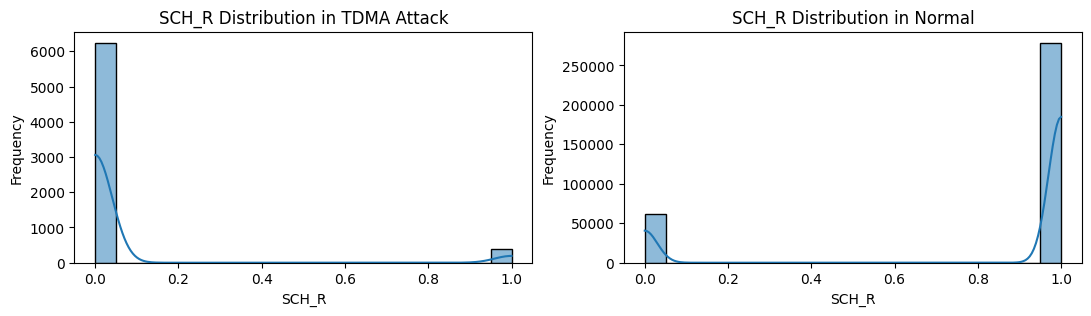

In [43]:
tdma_data = df[df['Attack type'] == 'TDMA']
normal_data = df[df['Attack type'] == 'Normal']

fig, axes = plt.subplots(1, 2, figsize=(13,3))

sns.histplot(tdma_data['SCH_R'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('SCH_R Distribution in TDMA Attack')
axes[0].set_xlabel('SCH_R')
axes[0].set_ylabel('Frequency')

sns.histplot(normal_data['SCH_R'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('SCH_R Distribution in Normal')
axes[1].set_xlabel('SCH_R')
axes[1].set_ylabel('Frequency')

plt.show()


#Data splitting

In [44]:
from sklearn.model_selection import train_test_split

X = df_select.drop('Attack type', axis=1)
y = df_select['Attack type']

# Split the data into training, validation, and test sets
# Use test_size=0.2 for an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Further split the temporary set into validation and test sets
# Use test_size=0.5 for a 50-50 split between validation and test sets
X_valid, X_train, y_valid, y_train = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=False)

# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (89919, 9)
X_valid shape: (209809, 9)
X_test shape: (74933, 9)
y_train shape: (89919,)
y_valid shape: (209809,)
y_test shape: (74933,)


In [45]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Min-Max scaling for continuous features
continuous_features = [ 'ADV_S', 'ADV_R', 'SCH_S', 'DATA_S', 'DATA_R', 'Data_Sent_To_BS', 'Consumed Energy']
binary_features = ['Is_CH', 'SCH_R']
minmax_scaler = MinMaxScaler()

# Scale continuous features
data_train_continuous_scaled = minmax_scaler.fit_transform(X_train[continuous_features])
data_valid_continuous_scaled = minmax_scaler.transform(X_valid[continuous_features])
data_test_continuous_scaled = minmax_scaler.transform(X_test[continuous_features])

# Create DataFrames for scaled continuous features
data_train_continuous_scaled_df = pd.DataFrame(data_train_continuous_scaled, columns=continuous_features)
data_valid_continuous_scaled_df = pd.DataFrame(data_valid_continuous_scaled, columns=continuous_features)
data_test_continuous_scaled_df = pd.DataFrame(data_test_continuous_scaled, columns=continuous_features)

# Reset index before concatenation
X_train_reset_index = X_train[binary_features].reset_index(drop=True)
X_valid_reset_index = X_valid[binary_features].reset_index(drop=True)
X_test_reset_index = X_test[binary_features].reset_index(drop=True)

# Concatenate binary features with scaled continuous features and labels without shuffling
data_train = pd.concat([X_train_reset_index, data_train_continuous_scaled_df, y_train.reset_index(drop=True)], axis=1)
data_valid = pd.concat([X_valid_reset_index, data_valid_continuous_scaled_df, y_valid.reset_index(drop=True)], axis=1)
data_test = pd.concat([X_test_reset_index, data_test_continuous_scaled_df, y_test.reset_index(drop=True)], axis=1)
data_train=data_train.drop('Attack type' , axis=1)
data_valid=data_valid.drop('Attack type' , axis=1)
data_test=data_test.drop('Attack type' , axis=1)

In [46]:
X_train.head()

,Is_CH,ADV_S,ADV_R,SCH_S,SCH_R,DATA_S,DATA_R,Data_Sent_To_BS,Consumed Energy
209809,0,0,6,0,1,51,0,0,2.39935
209810,0,0,6,0,1,96,0,0,0.16036
209811,0,0,6,0,1,55,0,0,0.09489
209812,0,0,6,0,1,96,0,0,0.16102
209813,0,0,6,0,1,96,0,0,0.16427


In [47]:
data_train.head()

,Is_CH,SCH_R,ADV_S,ADV_R,SCH_S,DATA_S,DATA_R,Data_Sent_To_BS,Consumed Energy
0,0,1,0.0,0.214286,0.0,0.211618,0.0,0.0,0.484563
1,0,1,0.0,0.214286,0.0,0.398340,0.0,0.0,0.032386
2,0,1,0.0,0.214286,0.0,0.228216,0.0,0.0,0.019164
3,0,1,0.0,0.214286,0.0,0.398340,0.0,0.0,0.032519
4,0,1,0.0,0.214286,0.0,0.398340,0.0,0.0,0.033175


In [48]:
le = LabelEncoder()

# Encode labels
target_train = le.fit_transform(y_train)
target_test = le.transform(y_test)
target_valid = le.transform(y_valid)

#the whole data sets X and Y
train_data = pd.concat([X_train, pd.Series(target_train, name='Attack type')], axis=1)
test_data = pd.concat([X_test, pd.Series(target_test, name='Attack type')], axis=1)
valid_data = pd.concat([X_valid, pd.Series(target_valid, name='Attack type')], axis=1)

In [49]:
from imblearn.under_sampling import RandomUnderSampler

# Define the under-sampler
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)


# Apply under-sampling to the training data
data_train_resampled, target_train_resampled = under_sampler.fit_resample(data_train, target_train)

# Print the shapes of the resampled datasets
print(f"X_train_resampled shape: {data_train_resampled.shape}")
print(f"target_train_resampled shape: {target_train_resampled.shape}")

X_train_resampled shape: (4835, 9)
target_train_resampled shape: (4835,)


In [50]:
#show the shape of the whole data
print(train_data.shape,' ',test_data.shape,' ',valid_data.shape)

(179838, 10)   (149866, 10)   (209809, 10)


#Feedforward

##ANN

ANN with BatchNormalization

In [51]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Build the MLP model with Batch Normalization
input_shape = data_train_resampled.shape[1]
num_classes = len(np.unique(target_train))

ann_classifier1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(input_shape,)),
    tf.keras.layers.BatchNormalization(),  # Add Batch Normalization here
    tf.keras.layers.Activation('relu'),     # Add Activation layer separately
    tf.keras.layers.Dense(20),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

ann_classifier1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and save the history
history_ann1= ann_classifier1.fit(data_train_resampled, target_train_resampled, epochs=25, validation_data=(data_valid ,target_valid))

#10 epochs 5s 124ms/step - loss: 0.2732 - accuracy: 0.8728 - val_loss: 0.2310 - val_accuracy: 0.9617
#25 epochs  loss: 0.1779 - accuracy: 0.9125 - val_loss: 0.1211 - val_accuracy: 0.9754

Epoch 1/25
152/152 [==============================] - 12s 67ms/step - loss: 0.8291 - accuracy: 0.7371 - val_loss: 1.0131 - val_accuracy: 0.9229
Epoch 2/25
152/152 [==============================] - 10s 64ms/step - loss: 0.4394 - accuracy: 0.8697 - val_loss: 0.3571 - val_accuracy: 0.9307
Epoch 3/25
152/152 [==============================] - 9s 57ms/step - loss: 0.3291 - accuracy: 0.8778 - val_loss: 0.1684 - val_accuracy: 0.9529
Epoch 4/25
152/152 [==============================] - 10s 64ms/step - loss: 0.2945 - accuracy: 0.8848 - val_loss: 0.1495 - val_accuracy: 0.9556
Epoch 5/25
152/152 [==============================] - 11s 70ms/step - loss: 0.2700 - accuracy: 0.8908 - val_loss: 0.1376 - val_accuracy: 0.9565
Epoch 6/25
152/152 [==============================] - 21s 139ms/step - loss: 0.2541 - accuracy: 0.8949 - val_loss: 0.1380 - val_accuracy: 0.9567
Epoch 7/25
152/152 [==============================] - 11s 71ms/step - loss: 0.2451 - accuracy: 0.8933 - val_loss: 0.1334 - val_accuracy:

In [52]:
#Predict the values using the ANN model
y_pred_probabilities1 = ann_classifier1.predict(data_test)
y_pred_ann1= tf.argmax(y_pred_probabilities1, axis=1)

2342/2342 [==============================] - 4s 2ms/step


In [53]:
#Predict the values using the ANN model
y_pred_probabilities1 = ann_classifier1.predict(data_test)
y_pred_ann1= tf.argmax(y_pred_probabilities1, axis=1)

2342/2342 [==============================] - 3s 1ms/step


In [54]:
#calculating the testing accuracy for the ANN model
accuracy1 = accuracy_score(target_test, y_pred_ann1)
print(f'ANN Accuracy: {accuracy1 * 100:.2f}%')
print("Classification Report for ANN\n", classification_report(target_test,y_pred_ann1))
#10 epochs ANN Accuracy: 93.18%
#25 epochs 94.30%

ANN Accuracy: 94.06%
Classification Report for ANN
               precision    recall  f1-score   support

           0       0.87      0.20      0.33      2617
           1       1.00      0.89      0.94       462
           2       0.41      0.63      0.50      3290
           3       1.00      0.99      0.99     66938
           4       0.54      0.93      0.68      1626

    accuracy                           0.94     74933
   macro avg       0.76      0.73      0.69     74933
weighted avg       0.96      0.94      0.94     74933



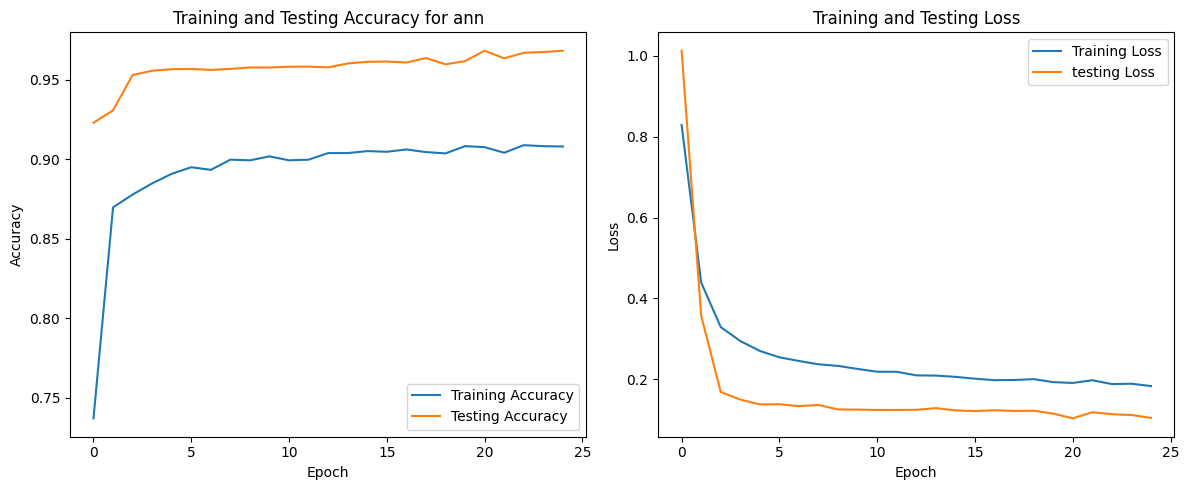

In [55]:
plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann1.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann1.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy for ann')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann1.history['loss'], label='Training Loss')
plt.plot(history_ann1.history['val_loss'], label='testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#the gap was gone the first time we run the code after adjusting the training set percent ,
# but we forgot to save the initial weights and the gap get back the next time we run it

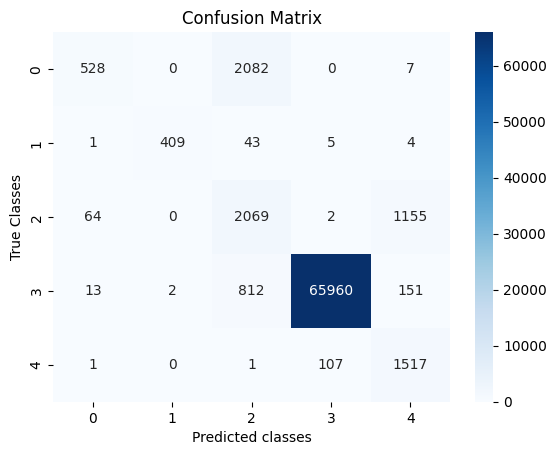

In [56]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, y_pred_ann1), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

ANN with BatchNormalization and Dropout

In [57]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential

# Build the ann model with Batch Normalization and Dropout
input_shape = data_train_resampled.shape[1]
num_classes = len(np.unique(target_train_resampled))

ann_classifier = Sequential([
    Dense(50, input_shape=(input_shape,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(20),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

ann_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and save the history
history_ann2 = ann_classifier.fit(data_train_resampled, target_train_resampled, epochs=25, validation_data=(data_valid, target_valid))
#10 epochs - 21s 490ms/step - loss: 0.5397 - accuracy: 0.7588 - val_loss: 0.1775 - val_accuracy: 0.9595
# 25 epochs 152/152 [==============================] - 11s 72ms/step - loss: 0.3444 - accuracy: 0.8534 - val_loss: 0.1911 - val_accuracy: 0.9632

Epoch 1/25
152/152 [==============================] - 13s 75ms/step - loss: 1.4191 - accuracy: 0.4184 - val_loss: 1.1263 - val_accuracy: 0.9330
Epoch 2/25
152/152 [==============================] - 11s 70ms/step - loss: 0.9589 - accuracy: 0.6509 - val_loss: 0.5090 - val_accuracy: 0.9504
Epoch 3/25
152/152 [==============================] - 11s 70ms/step - loss: 0.7908 - accuracy: 0.7158 - val_loss: 0.2256 - val_accuracy: 0.9518
Epoch 4/25
152/152 [==============================] - 11s 70ms/step - loss: 0.6990 - accuracy: 0.7411 - val_loss: 0.1717 - val_accuracy: 0.9524
Epoch 5/25
152/152 [==============================] - 9s 58ms/step - loss: 0.6244 - accuracy: 0.7553 - val_loss: 0.1611 - val_accuracy: 0.9528
Epoch 6/25
152/152 [==============================] - 11s 70ms/step - loss: 0.5812 - accuracy: 0.7727 - val_loss: 0.1580 - val_accuracy: 0.9533
Epoch 7/25
152/152 [==============================] - 11s 70ms/step - loss: 0.5342 - accuracy: 0.7874 - val_loss: 0.1624 - val_accuracy: 

In [58]:
#Predict the values using the ANN model
y_pred_probabilities2 = ann_classifier.predict(data_test)
y_pred_ann2= tf.argmax(y_pred_probabilities2, axis=1)

2342/2342 [==============================] - 4s 2ms/step


In [59]:
#calculating the testing accuracy for the ANN model
accuracy2 = accuracy_score(target_test, y_pred_ann2)
print(f'ANN Accuracy: {accuracy2 * 100:.2f}%')
print("Classification Report for ANN\n", classification_report(target_test,y_pred_ann2))
#10 epochs ANN Accuracy: 92.64%
#25 epochs ANN Accuracy: 92.26%

ANN Accuracy: 92.11%
Classification Report for ANN
               precision    recall  f1-score   support

           0       0.81      0.14      0.24      2617
           1       1.00      0.83      0.91       462
           2       0.36      0.60      0.45      3290
           3       1.00      0.97      0.98     66938
           4       0.40      0.92      0.56      1626

    accuracy                           0.92     74933
   macro avg       0.72      0.69      0.63     74933
weighted avg       0.95      0.92      0.92     74933



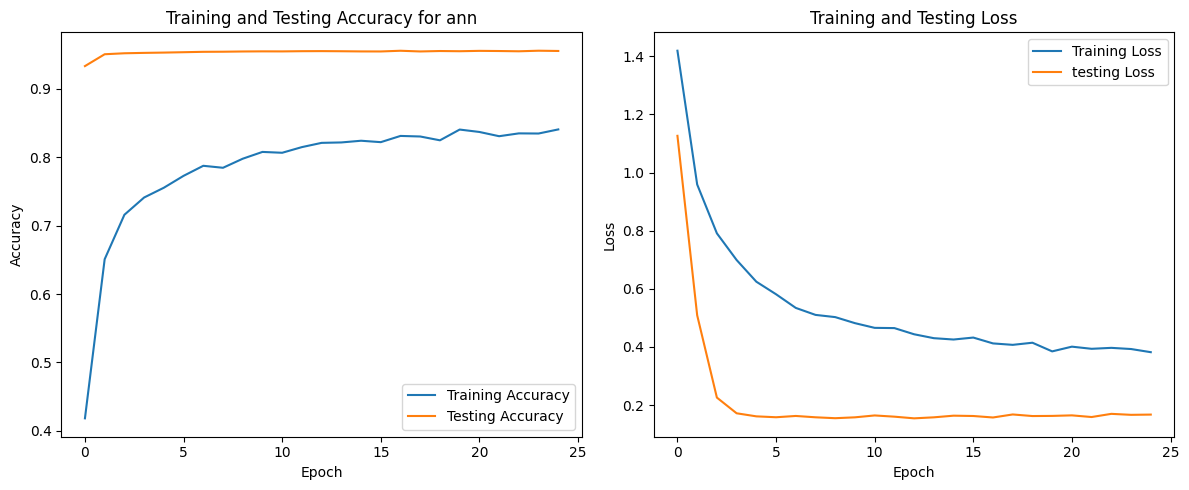

In [60]:
plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann2.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann2.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy for ann')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann2.history['loss'], label='Training Loss')
plt.plot(history_ann2.history['val_loss'], label='testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

ANN with Dropout

In [61]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential

# Build the ANN model with Batch Normalization and Dropout
input_shape = data_train_resampled.shape[1]
num_classes = len(np.unique(target_train_resampled))

ann_classifier = Sequential([
    Dense(64, input_shape=(input_shape,)),
    Activation('relu'),
    Dropout(0.5),  # Add Dropout layer with a dropout rate (e.g., 0.5)
    Dense(32),
    Activation('relu'),
    Dropout(0.5),  # Add Dropout layer with a dropout rate (e.g., 0.5)
    Dense(num_classes, activation='softmax')
])

ann_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and save the history
history_ann3 = ann_classifier.fit(data_train_resampled, target_train_resampled, epochs=25, validation_data=(data_valid, target_valid))
#10 epochs 43/43 [==============================] - 10s 246ms/step - loss: 0.5399 - accuracy: 0.7537 - val_loss: 0.2171 - val_accuracy: 0.9612  + data spliting 70 30
#25 epochs - loss: 0.2747 - accuracy: 0.8802 - val_loss: 0.2239 - val_accuracy: 0.9637 +  data spliting 80 20

Epoch 1/25
152/152 [==============================] - 10s 62ms/step - loss: 1.3915 - accuracy: 0.4306 - val_loss: 0.5514 - val_accuracy: 0.9212
Epoch 2/25
152/152 [==============================] - 9s 62ms/step - loss: 0.9316 - accuracy: 0.6503 - val_loss: 0.2303 - val_accuracy: 0.9455
Epoch 3/25
152/152 [==============================] - 21s 138ms/step - loss: 0.6809 - accuracy: 0.7444 - val_loss: 0.1865 - val_accuracy: 0.9467
Epoch 4/25
152/152 [==============================] - 9s 63ms/step - loss: 0.5597 - accuracy: 0.7801 - val_loss: 0.1750 - val_accuracy: 0.9475
Epoch 5/25
152/152 [==============================] - 11s 70ms/step - loss: 0.5004 - accuracy: 0.7965 - val_loss: 0.1710 - val_accuracy: 0.9511
Epoch 6/25
152/152 [==============================] - 11s 71ms/step - loss: 0.4524 - accuracy: 0.8105 - val_loss: 0.1664 - val_accuracy: 0.9524
Epoch 7/25
152/152 [==============================] - 11s 70ms/step - loss: 0.4219 - accuracy: 0.8254 - val_loss: 0.1648 - val_accuracy: 

In [62]:
#Predict the values using the ANN model
y_pred_probabilities3 = ann_classifier.predict(data_test)
y_pred_ann3= tf.argmax(y_pred_probabilities3, axis=1)

2342/2342 [==============================] - 4s 2ms/step


In [63]:
#calculating the testing accuracy for the ANN model
accuracy3= accuracy_score(target_test, y_pred_ann3)
print(f'ANN Accuracy: {accuracy3 * 100:.2f}%')
print("Classification Report for ANN\n", classification_report(target_test,y_pred_ann3))
#10 epochs ANN Accuracy: 92.53%
#25 epochs 92.40%

ANN Accuracy: 92.36%
Classification Report for ANN
               precision    recall  f1-score   support

           0       0.26      0.16      0.20      2617
           1       1.00      0.90      0.95       462
           2       0.34      0.62      0.44      3290
           3       1.00      0.97      0.98     66938
           4       0.80      0.93      0.86      1626

    accuracy                           0.92     74933
   macro avg       0.68      0.72      0.68     74933
weighted avg       0.94      0.92      0.93     74933



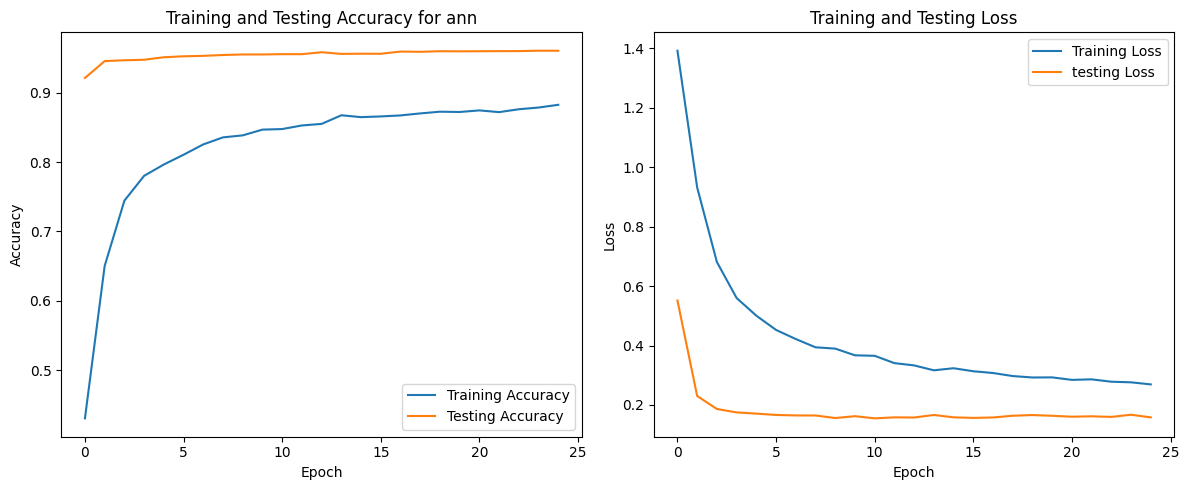

In [64]:
plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann3.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann3.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy for ann')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann3.history['loss'], label='Training Loss')
plt.plot(history_ann3.history['val_loss'], label='testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Normal ANN

In [65]:
seed_value = 42

# Set seed for Numpy(so the initial random weights won't change)
np.random.seed(seed_value)

# Set seed for TensorFlow
tf.random.set_seed(seed_value)

#Build the ANN model and fit the data to it
input_shape = data_train_resampled.shape[1]
num_classes = 5
ann_classifier0= tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

ann_classifier0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ann0= ann_classifier0.fit(data_train_resampled, target_train_resampled, epochs=25, validation_data=(data_valid, target_valid))
#10 epochs s 129ms/step - loss: 0.3067 - accuracy: 0.8640 - val_loss: 0.2315 - val_accuracy: 0.9596
#25 epochs oss: 0.1789 - accuracy: 0.9138 - val_loss: 0.1515 - val_accuracy: 0.9642

Epoch 1/25
152/152 [==============================] - 11s 71ms/step - loss: 1.2058 - accuracy: 0.6498 - val_loss: 0.2687 - val_accuracy: 0.9455
Epoch 2/25
152/152 [==============================] - 9s 63ms/step - loss: 0.5550 - accuracy: 0.8277 - val_loss: 0.1910 - val_accuracy: 0.9468
Epoch 3/25
152/152 [==============================] - 9s 58ms/step - loss: 0.3820 - accuracy: 0.8602 - val_loss: 0.1715 - val_accuracy: 0.9510
Epoch 4/25
152/152 [==============================] - 10s 64ms/step - loss: 0.3187 - accuracy: 0.8751 - val_loss: 0.1699 - val_accuracy: 0.9540
Epoch 5/25
152/152 [==============================] - 11s 70ms/step - loss: 0.2884 - accuracy: 0.8825 - val_loss: 0.1517 - val_accuracy: 0.9549
Epoch 6/25
152/152 [==============================] - 11s 71ms/step - loss: 0.2717 - accuracy: 0.8838 - val_loss: 0.1544 - val_accuracy: 0.9553
Epoch 7/25
152/152 [==============================] - 8s 54ms/step - loss: 0.2588 - accuracy: 0.8889 - val_loss: 0.1410 - val_accuracy: 0.

In [66]:
#Predict the values using the ANN model
y_pred_probabilities0 = ann_classifier0.predict(data_test)
y_pred_ann0= tf.argmax(y_pred_probabilities0, axis=1)

2342/2342 [==============================] - 3s 1ms/step


In [67]:
#calculating the testing accuracy for the ANN model
accuracy0= accuracy_score(target_test, y_pred_ann0)
print(f'ANN Accuracy: {accuracy0 * 100:.2f}%')
print("Classification Report for ANN\n", classification_report(target_test,y_pred_ann0))
#10 epochs 92.73%
#25 epochs  92.64%

ANN Accuracy: 93.42%
Classification Report for ANN
               precision    recall  f1-score   support

           0       0.32      0.21      0.25      2617
           1       1.00      0.84      0.91       462
           2       0.42      0.61      0.49      3290
           3       1.00      0.98      0.99     66938
           4       0.65      0.93      0.76      1626

    accuracy                           0.93     74933
   macro avg       0.68      0.71      0.68     74933
weighted avg       0.94      0.93      0.94     74933



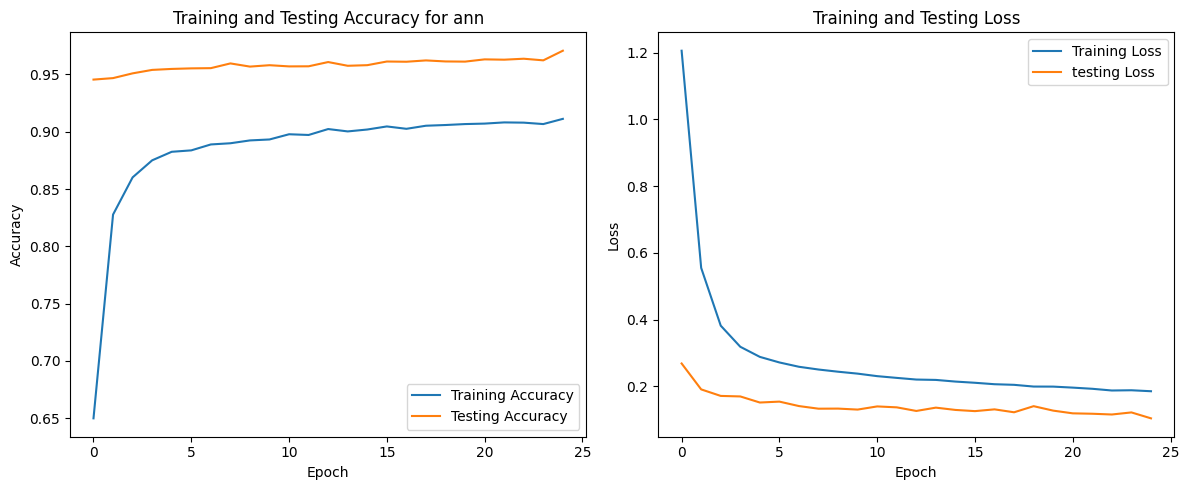

In [68]:
plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann0.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann0.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy for ann')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann0.history['loss'], label='Training Loss')
plt.plot(history_ann0.history['val_loss'], label='testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

##MLP

In [69]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Build the MLP model
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=1000,
    batch_size=64,
    tol=1e-4,       # convergence criteria
    random_state=42
)

# Fit the model to the training data
history_mlp = mlp_classifier.fit(data_train_resampled, target_train_resampled)

# Predict the values using the MLP model
y_pred_mlp = mlp_classifier.predict(data_test)


In [70]:
#calculating the testing accuracy for the MLP model
accuracy_mlp= accuracy_score(target_test, y_pred_mlp)
print(f'MLP Accuracy: {accuracy_mlp * 100:.2f}%')
print("Classification Report for MLP\n", classification_report(target_test,y_pred_mlp ))

MLP Accuracy: 98.26%
Classification Report for MLP
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      2617
           1       1.00      0.80      0.89       462
           2       0.93      0.75      0.83      3290
           3       1.00      1.00      1.00     66938
           4       0.95      0.93      0.94      1626

    accuracy                           0.98     74933
   macro avg       0.93      0.89      0.90     74933
weighted avg       0.98      0.98      0.98     74933



In [71]:
train_accuracy = mlp_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy = mlp_classifier.score(data_test, target_test)
ta=mlp_classifier.score(data_test, target_test)
print(f'Training Accuracy: {train_accuracy* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy* 100:.2f}%')

Training Accuracy: 98.76%
Test Accuracy: 98.26%


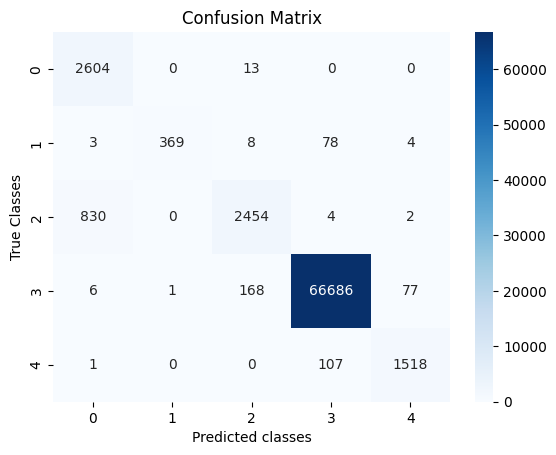

In [72]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, y_pred_mlp), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#KNN

In [73]:
#Build the KNN model and fit the data to it
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the KNN model
target_pred_knn = knn_classifier.predict(data_test)

In [74]:
#calculating the testing accuracy for the KNN model
accuracy_knn = accuracy_score(target_test, target_pred_knn)
print(f'Testing Accuracy: {accuracy_knn* 100:.2f}%')
print("Classification Report for KNN\n", classification_report(target_test,target_pred_knn ))

Testing Accuracy: 97.20%
Classification Report for KNN
               precision    recall  f1-score   support

           0       0.74      0.97      0.84      2617
           1       0.79      0.80      0.80       462
           2       0.87      0.73      0.79      3290
           3       1.00      0.99      0.99     66938
           4       0.72      0.92      0.81      1626

    accuracy                           0.97     74933
   macro avg       0.82      0.88      0.84     74933
weighted avg       0.98      0.97      0.97     74933



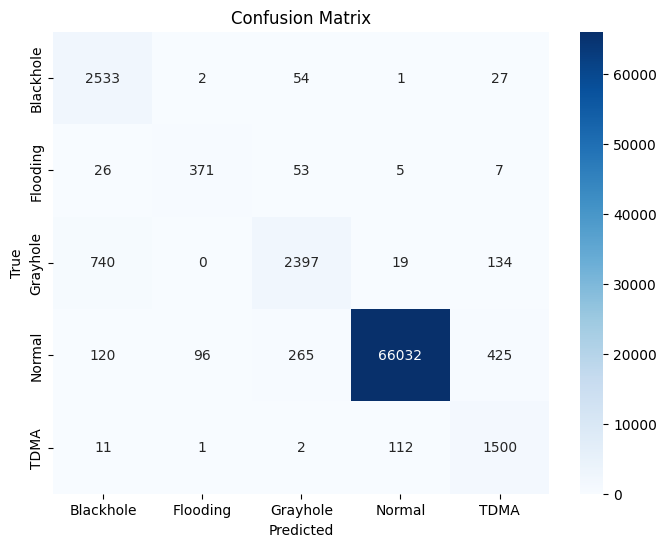

In [75]:
class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']


cm = confusion_matrix(target_test, target_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [76]:
#checking if there is overfitting
train_accuracy_knn = knn_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_knn = knn_classifier.score(data_test, target_test)
ta=mlp_classifier.score(data_test, target_test)
print(f'Training Accuracy: {train_accuracy_knn* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_knn* 100:.2f}%')

Training Accuracy: 98.72%
Test Accuracy: 97.20%


#Decision Tree

In [77]:
#Build the DT model and fit the data to it
dt_classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy',random_state=123)
dt_classifier.fit(data_train_resampled,np.ravel(target_train_resampled))
#Predict the values using the DT model
target_pred_dt = dt_classifier.predict(data_test)

In [78]:
#calculating the testing accuracy for the DT model
print("Classification Report for DT\n", classification_report(target_test,target_pred_dt ))
print('DT accuracy:' , round(accuracy_score(target_test,target_pred_dt)*100, 2), '%')

Classification Report for DT
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      2617
           1       1.00      0.90      0.95       462
           2       0.55      0.97      0.70      3290
           3       1.00      0.97      0.98     66938
           4       1.00      0.85      0.92      1626

    accuracy                           0.96     74933
   macro avg       0.90      0.91      0.89     74933
weighted avg       0.98      0.96      0.97     74933

DT accuracy: 96.2 %


Test accuracy for Decision tree Classifier: 96.2 %


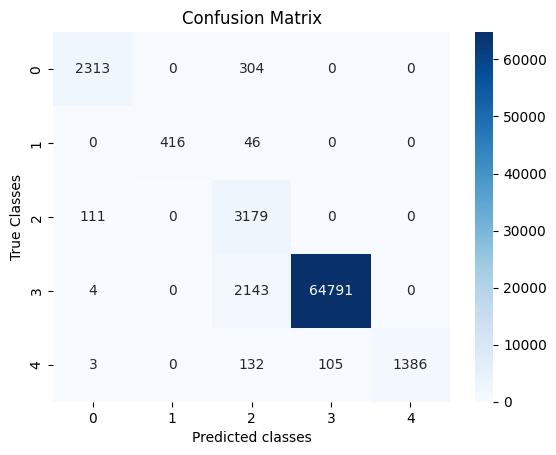

In [79]:
# Plotting confusion matrix
print('Test accuracy for Decision tree Classifier:'\
      , round(accuracy_score(target_test,target_pred_dt)*100, 2), '%')
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test,target_pred_dt), annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted classes')
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#Random Forest Classifier

In [80]:
#Build the RF model and fit the data to it
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the RF model
target_pred_rf = rf_classifier.predict(data_test)

In [81]:
#calculating the testing accuracy for the RF model
accuracy_RF = accuracy_score(target_test, target_pred_rf)
print(f'Test Accuracy: {accuracy_RF* 100:.2f}%')
print("Classification Report for RF\n", classification_report(target_test,target_pred_rf ))

Test Accuracy: 98.78%
Classification Report for RF
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2617
           1       1.00      0.90      0.95       462
           2       0.85      0.95      0.90      3290
           3       1.00      0.99      0.99     66938
           4       0.95      0.93      0.94      1626

    accuracy                           0.99     74933
   macro avg       0.95      0.95      0.95     74933
weighted avg       0.99      0.99      0.99     74933



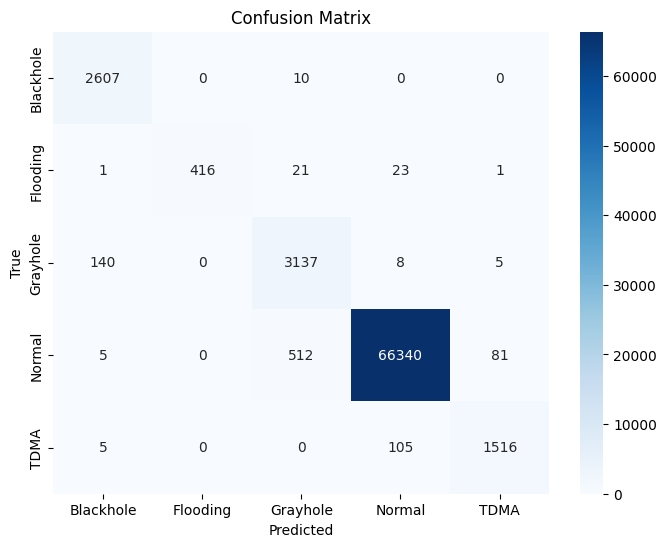

In [82]:
class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']


cm = confusion_matrix(target_test, target_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [83]:
#checking if there is overfitting
train_accuracy_rf = rf_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_rf =rf_classifier.score(data_test, target_test)
print(f'Train Accuracy: {train_accuracy_rf* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_rf* 100:.2f}%')

Train Accuracy: 99.96%
Test Accuracy: 98.78%


#XGBoost Classifier

In [84]:
#Build the XGB model and fit the data to it
xgb_classifier = XGBClassifier()
xgb_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the XGB model
target_pred_xgb = xgb_classifier.predict(data_test)

In [85]:
#calculating the testing accuracy for the XGB model
accuracy_xgb = accuracy_score(target_test, target_pred_xgb)
print(f'Test Accuracy: {accuracy_xgb* 100:.2f}%')
print("Classification Report for xgb\n", classification_report(target_test,target_pred_xgb ))

Test Accuracy: 98.63%
Classification Report for xgb
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2617
           1       1.00      0.56      0.71       462
           2       0.88      0.94      0.91      3290
           3       1.00      0.99      0.99     66938
           4       0.91      0.93      0.92      1626

    accuracy                           0.99     74933
   macro avg       0.94      0.88      0.90     74933
weighted avg       0.99      0.99      0.99     74933



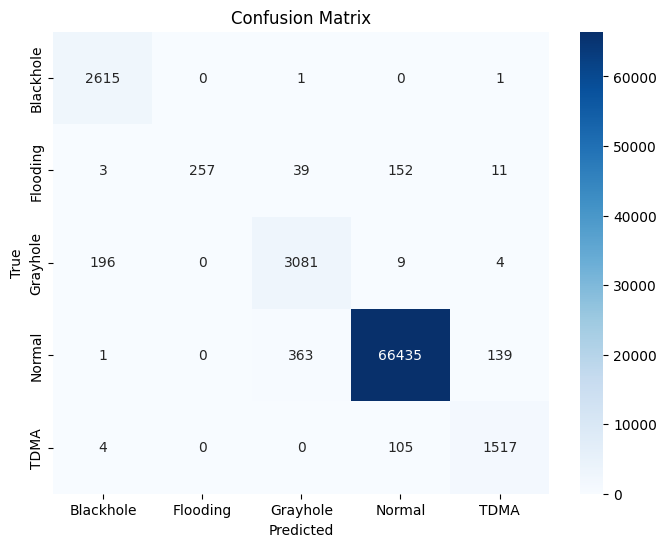

In [86]:
# Plotting confusion matrix
class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']
cm = confusion_matrix(target_test, target_pred_xgb)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [87]:
#checking if there is overfitting
train_accuracy_xgb = xgb_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_xgb = xgb_classifier.score(data_test, target_test)
print(f'Train Accuracy: {train_accuracy_xgb* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_xgb* 100:.2f}%')

Train Accuracy: 99.90%
Test Accuracy: 98.63%


#Gaussian Naive Bayes Classifier

In [88]:
#Build the NB model and fit the data to it
nb_classifier = GaussianNB()
nb_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the NB model
target_pred_nb = nb_classifier.predict(data_test)

In [89]:
#calculating the testing accuracy for the NB model
accuracy_nb = accuracy_score(target_test, target_pred_nb)
print(f'Test Accuracy: {accuracy_nb* 100:.2f}%')
print("Classification Report for Naive Bayes\n", classification_report(target_test,target_pred_nb ))

Test Accuracy: 94.14%
Classification Report for Naive Bayes
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      2617
           1       0.74      1.00      0.85       462
           2       0.54      0.36      0.43      3290
           3       1.00      0.97      0.98     66938
           4       0.48      0.93      0.63      1626

    accuracy                           0.94     74933
   macro avg       0.68      0.85      0.73     74933
weighted avg       0.95      0.94      0.94     74933



In [90]:
#check if there is overfitting
train_accuracy_nb = nb_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_nb = nb_classifier.score(data_test, target_test)
print(f'Train Accuracy: {train_accuracy_nb* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_nb* 100:.2f}%')

Train Accuracy: 90.49%
Test Accuracy: 94.14%


In [91]:
print("Length of data_test:", len(data_test))
print("Length of target_test:", len(target_test))
print("Length of target_pred_nb:", len(target_pred_nb))


Length of data_test: 74933
Length of target_test: 74933
Length of target_pred_nb: 74933


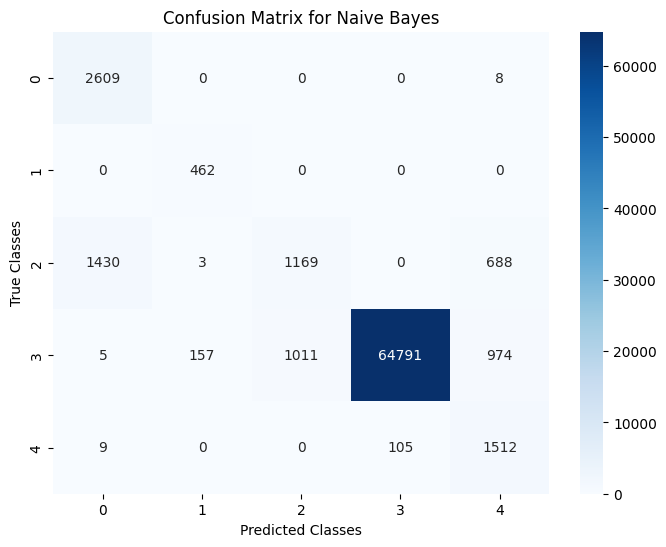

In [92]:
# Build confusion matrix
conf_matrix_nb = confusion_matrix(target_test, target_pred_nb)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

#Logistic Regression Classifier

In [93]:
#Build the LR model and fit the data to it
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(data_train_resampled,target_train_resampled)
#Predict the values using the LR model
target_pred_logreg = logreg_classifier.predict(data_test)

In [94]:
#calculating the testing accuracy for the LR model
accuracy_logreg = accuracy_score(target_test, target_pred_logreg)
print(f'Test Accuracy: {accuracy_logreg* 100:.2f}%')
print("Classification Report for Logistic Regression\n", classification_report(target_test,target_pred_logreg ))

Test Accuracy: 91.83%
Classification Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.58      0.15      0.24      2617
           1       0.92      0.64      0.76       462
           2       0.36      0.56      0.43      3290
           3       1.00      0.97      0.98     66938
           4       0.38      0.92      0.54      1626

    accuracy                           0.92     74933
   macro avg       0.65      0.65      0.59     74933
weighted avg       0.94      0.92      0.92     74933



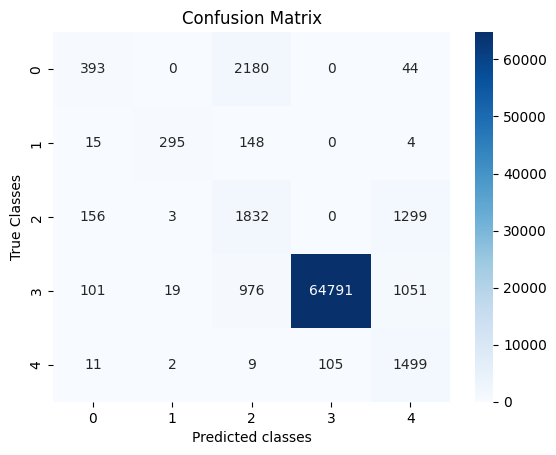

In [95]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, target_pred_logreg), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#Ridge Classifier

In [96]:
#Build the Ridge model and fit the data to it
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the Ridge model
target_pred_ridge = ridge_classifier.predict(data_test)


In [97]:
#calculating the testing accuracy for the Ridge model
accuracy_ridge = accuracy_score(target_test, target_pred_ridge)
print(f'Test Accuracy: {accuracy_ridge* 100:.2f}%')
print("Classification Report for Ridge\n", classification_report(target_test,target_pred_ridge))

Test Accuracy: 91.41%
Classification Report for Ridge
               precision    recall  f1-score   support

           0       0.24      0.14      0.17      2617
           1       0.75      0.56      0.64       462
           2       0.39      0.48      0.43      3290
           3       1.00      0.97      0.98     66938
           4       0.36      0.93      0.52      1626

    accuracy                           0.91     74933
   macro avg       0.55      0.62      0.55     74933
weighted avg       0.93      0.91      0.92     74933



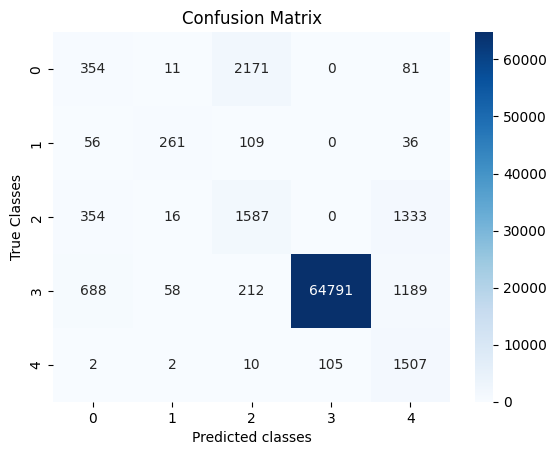

In [98]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, target_pred_ridge), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#SGD Classifier

In [99]:
#Build the SGD model and fit the data to it
sgd_classifier = SGDClassifier()
sgd_classifier.fit(data_train_resampled,target_train_resampled)
#Predict the values using the Ridge model
target_pred_sgd = sgd_classifier.predict(data_test)

In [100]:
#calculating the testing accuracy for the SGD model
accuracy_sgd = accuracy_score(target_test, target_pred_sgd)
print(f'Test Accuracy: {accuracy_sgd* 100:.2f}%')
print("Classification Report for SGD\n", classification_report(target_test,target_pred_sgd))

Test Accuracy: 92.02%
Classification Report for SGD
               precision    recall  f1-score   support

           0       0.54      0.14      0.22      2617
           1       1.00      0.82      0.90       462
           2       0.36      0.55      0.44      3290
           3       1.00      0.97      0.98     66938
           4       0.39      0.93      0.55      1626

    accuracy                           0.92     74933
   macro avg       0.66      0.68      0.62     74933
weighted avg       0.94      0.92      0.92     74933



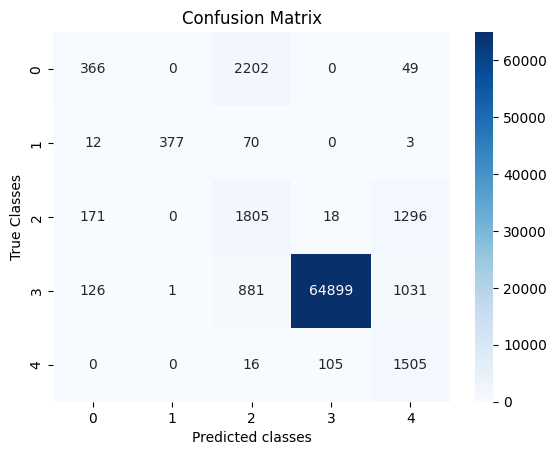

In [101]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, target_pred_sgd), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#SVM

##Linear SVM

In [102]:
from sklearn.svm import SVC
#calculating the testing accuracy for the SVM model
svm_classifierL = SVC(kernel='linear')
svm_classifierL.fit(data_train_resampled,target_train_resampled)
#Predict the values using the SVM model
target_pred_svm = svm_classifierL.predict(data_test)

In [103]:
#calculating the testing accuracy for the SGD model
accuracy_svm = accuracy_score(target_test, target_pred_svm)
print(f'Test Accuracy: {accuracy_svm* 100:.2f}%')
print("Classification Report for linear SVM:\n", classification_report(target_test,target_pred_svm ))

Test Accuracy: 91.90%
Classification Report for linear SVM:
               precision    recall  f1-score   support

           0       0.62      0.15      0.24      2617
           1       0.98      0.67      0.79       462
           2       0.36      0.57      0.44      3290
           3       1.00      0.97      0.98     66938
           4       0.39      0.93      0.55      1626

    accuracy                           0.92     74933
   macro avg       0.67      0.66      0.60     74933
weighted avg       0.94      0.92      0.92     74933



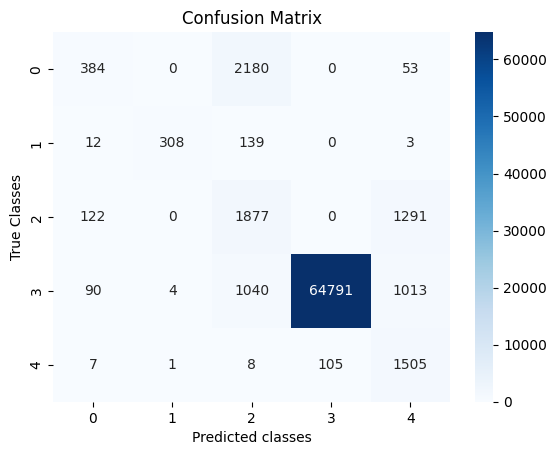

In [104]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, target_pred_svm), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#Testing Accuracy visualization

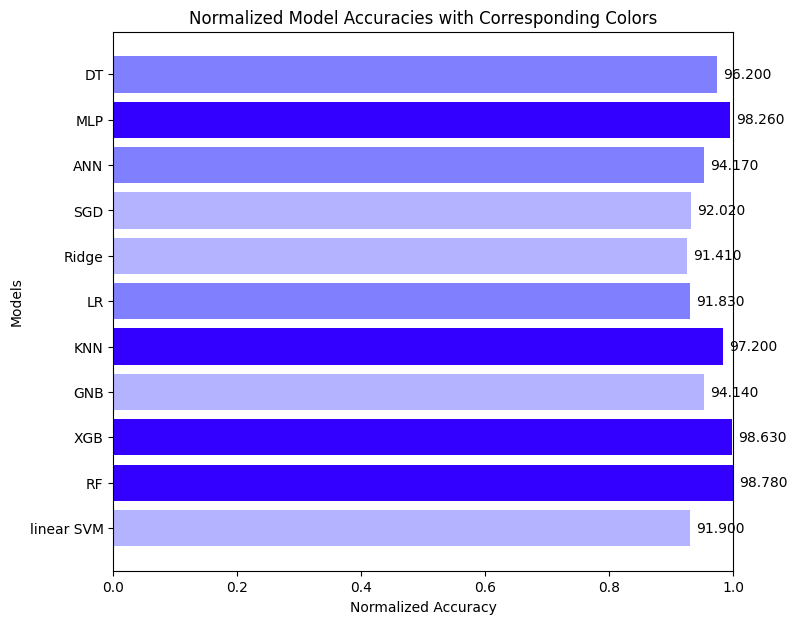

In [122]:
model_names = ['linear SVM', 'RF', 'XGB', 'GNB', 'KNN', 'LR', 'Ridge', 'SGD', 'ANN', 'MLP', 'DT']
accuracies = [91.90, 98.78, 98.63, 94.14, 97.20, 91.83, 91.41, 92.02, 94.17, 98.26, 96.2]

normalized_accuracies = np.array(accuracies) / max(accuracies)

model_colors = {
    'linear SVM': (0.7, 0.7, 1),
    'RF': (0.2, 0, 1),
    'XGB': (0.2, 0, 1),
    'GNB': (0.7, 0.7, 1),
    'KNN': (0.2, 0, 1),
    'LR': (0.5, 0.5, 1),
    'Ridge': (0.7, 0.7, 1),
    'SGD': (0.7, 0.7, 1),
    'ANN': (0.5, 0.5, 1),
    'MLP': (0.2, 0, 1),
    'DT': (0.5, 0.5, 1)
}

plt.figure(figsize=(8, 7))
bars = plt.barh(model_names, normalized_accuracies, color=[model_colors[model] for model in model_names])
plt.title('Normalized Model Accuracies with Corresponding Colors')
plt.xlabel('Normalized Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{accuracy:.3f}', ha='left', va='center')

plt.show()

#Ensemble Learning

##Ensemble Model

Ensemble model using a stacking ensemble classifier , compining KNN,MLP,XGB,NB as base model , and LogisticRegression as meta model(second level calssifier)  

In [106]:
#ensemble learing in two levels base models , then the results used in the meta model
from sklearn.ensemble import StackingClassifier
base_models = [
    ('rf', rf_classifier),
        ('knn', knn_classifier),
        ('xgb', xgb_classifier),
        ('mlp', mlp_classifier),
        ('nb', nb_classifier)
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_classifier.fit(data_train_resampled, target_train_resampled)

# Evaluate performance
accuracy_en_stacking = stacking_classifier.score(data_test, target_test)
print(f'Test Accuracy: {accuracy_en_stacking* 100:.2f}%')

Test Accuracy: 99.18%


In [107]:
#checking if there is overfitting
y_pred_train_ensemble1 = stacking_classifier.predict(data_train_resampled)
training_accuracy_en1 = accuracy_score(target_train_resampled, y_pred_train_ensemble1)
y_pred_test_ensemble1 = stacking_classifier.predict(data_test)
testing_accuracy_en1= accuracy_score(target_test, y_pred_test_ensemble1)

print(f'Training Accuracy: {training_accuracy_en1 * 100:.2f}%' ,f'Testing Accuracy: {testing_accuracy_en1 * 100:.2f}%' )

Training Accuracy: 99.94% Testing Accuracy: 99.18%


In [108]:
testing_accuracy_en1 = accuracy_score(target_test, y_pred_test_ensemble1)
print(f'Ensemble Accuracy: {testing_accuracy_en1 * 100:.2f}%')
print("Classification Report for Ensemble:\n", classification_report(target_test,y_pred_test_ensemble1 ))

Ensemble Accuracy: 99.18%
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2617
           1       0.99      0.87      0.93       462
           2       0.95      0.94      0.94      3290
           3       1.00      1.00      1.00     66938
           4       0.95      0.93      0.94      1626

    accuracy                           0.99     74933
   macro avg       0.96      0.95      0.95     74933
weighted avg       0.99      0.99      0.99     74933



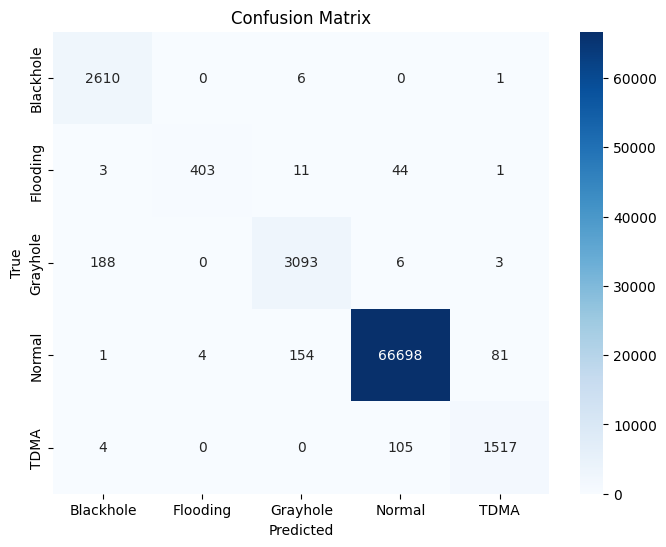

In [109]:
# Plotting confusion matrix
class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']
cm = confusion_matrix(target_test,y_pred_test_ensemble1)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


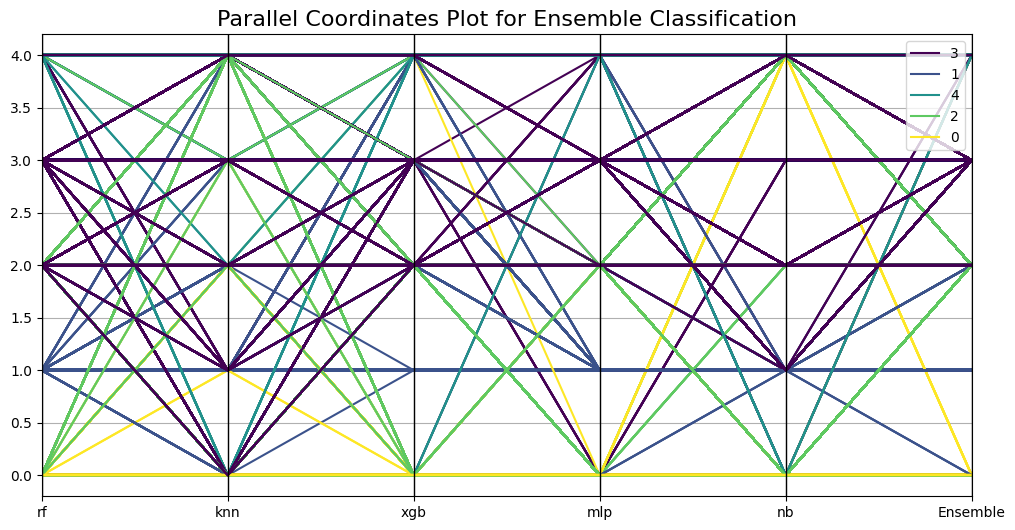

In [110]:
# Create a DataFrame for parallel coordinates plot
data = pd.DataFrame({
    'rf':  target_pred_rf,
    'knn': target_pred_knn,
    'xgb':  target_pred_xgb,
    'mlp': y_pred_mlp,
    'nb': target_pred_nb,
    'Ensemble': y_pred_test_ensemble1,
    'True Label': target_test
})

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(data, 'True Label', colormap='viridis')
plt.title('Parallel Coordinates Plot for Ensemble Classification', fontsize=16)
plt.show()

##Previous Ensemble Model Experiments

Ensmble model using fixed weights for KNN,ANN,XGB,NB,RF

In [111]:
#ensemble model using KNN, MLP ,XGB ,RF,NB and fixed weights
weights = {'rf': 0.3, 'knn': 0.133, 'xgb': 0.133, 'mlp': 0.3, 'nb': 0.133}
# Convert keys to integers
weights = {i: value for i, value in enumerate([0.3, 0.133, 0.133, 0.3, 0.133])}

# Rest of the code
ensemble_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('knn', knn_classifier),
        ('xgb', xgb_classifier),
        ('mlp', mlp_classifier),
        ('nb', nb_classifier)
    ],
    voting='soft',
    weights=weights
)

ensemble_classifier.fit(data_train_resampled, target_train_resampled)
y_pred_ensemble = ensemble_classifier.predict(data_test)

In [112]:
y_pred_train_ensemble = ensemble_classifier.predict(data_train_resampled)
training_accuracy_en = accuracy_score(target_train_resampled, y_pred_train_ensemble)
testing_accuracy_en= accuracy_score(target_test, y_pred_ensemble)


In [113]:
print(training_accuracy_en,testing_accuracy_en)

0.986142709410548 0.9724020124644682


In [114]:
#calculating the testing accuracy for the Ensemble model
accuracy = accuracy_score(target_test, y_pred_ensemble)
print(f'Ensemble Accuracy: {accuracy * 100:.2f}%')
print("Classification Report for Ensemble:\n", classification_report(target_test,y_pred_ensemble ))

Ensemble Accuracy: 97.24%
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84      2617
           1       0.94      0.95      0.94       462
           2       0.79      0.67      0.73      3290
           3       1.00      0.99      0.99     66938
           4       0.83      0.93      0.88      1626

    accuracy                           0.97     74933
   macro avg       0.86      0.91      0.88     74933
weighted avg       0.98      0.97      0.97     74933



In [115]:
#checking if there is overfitting
train_accuracy_en = ensemble_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_en = ensemble_classifier.score(data_test, target_test)
print(f'Training Accuracy: {train_accuracy_en}')
print(f'Test Accuracy: {test_accuracy_en}')

Training Accuracy: 0.986142709410548
Test Accuracy: 0.9724020124644682


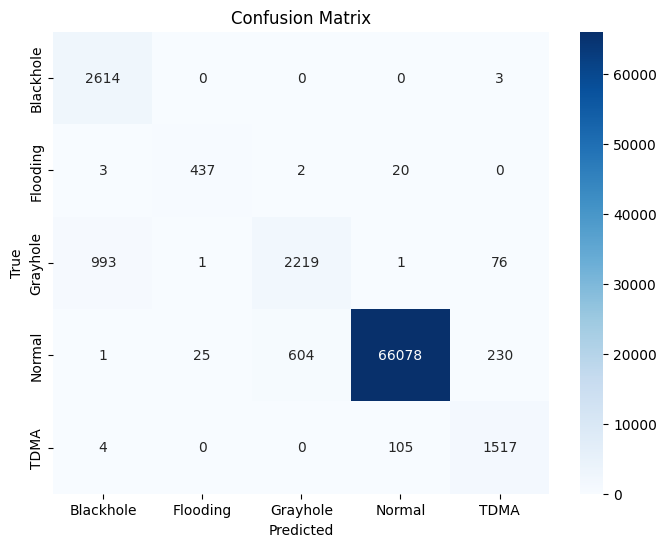

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']
cm = confusion_matrix(target_test, y_pred_ensemble)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [117]:
from sklearn.metrics import confusion_matrix
conf_matrix_en = confusion_matrix(target_test, y_pred_ensemble)

# Number of classes
num_classes = len(conf_matrix_en)
class_labels = ["blackhole", "flooding", "grayhole", "normal", "tdma"]

TP_per_class = []
FP_per_class = []
for i in range(len(class_labels)):
    # For each class i, TP is in the diagonal position (i, i) of the confusion matrix
    TP = conf_matrix_en[i, i]
    # FP for class i is the sum of predictions for class i across other actual classes
    FP = sum(conf_matrix_en[j, i] for j in range(len(class_labels)) if j != i)

    TP_per_class.append(TP)
    FP_per_class.append(FP)

# Print TP and FP for each class
for i in range(len(class_labels)):
    print(f'Class {class_labels[i]} - True Positives (TP): {TP_per_class[i]}, False Positives (FP): {FP_per_class[i]}')

Class blackhole - True Positives (TP): 2614, False Positives (FP): 1001
Class flooding - True Positives (TP): 437, False Positives (FP): 26
Class grayhole - True Positives (TP): 2219, False Positives (FP): 606
Class normal - True Positives (TP): 66078, False Positives (FP): 126
Class tdma - True Positives (TP): 1517, False Positives (FP): 309


Ensemble model using KNN,MLP,DT,NB,XGB and use MAXvoting method

In [118]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [119]:
#ensemble model using KNN, MLP ,XGB ,DT,NB and using max voting method
class MaxVotingEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, knn_classifier, dt_classifier, xgb_classifier, mlp_classifier, nb_classifier):
        self.knn_classifier = knn_classifier
        self.dt_classifier = dt_classifier
        self.xgb_classifier = xgb_classifier
        self.mlp_classifier = mlp_classifier
        self.nb_classifier = nb_classifier

    def fit(self, X, y):
        self.knn_classifier.fit(X, y)
        self.dt_classifier.fit(X, y)
        self.xgb_classifier.fit(X, y)
        self.mlp_classifier.fit(X, y)
        self.nb_classifier.fit(X, y)
        return self

    def predict(self, X):
        pred_knn = self.knn_classifier.predict(X)
        pred_dt = self.dt_classifier.predict(X)
        pred_xgb = self.xgb_classifier.predict(X)
        pred_mlp = self.mlp_classifier.predict(X)
        pred_nb = self.nb_classifier.predict(X)

        ensemble_prediction = np.maximum.reduce([pred_knn, pred_dt, pred_xgb, pred_mlp, pred_nb])
        return ensemble_prediction

ensemble_classifier_max = MaxVotingEnsembleClassifier(
    knn_classifier, dt_classifier, xgb_classifier, mlp_classifier, nb_classifier
)
ensemble_classifier_max.fit(data_train_resampled, target_train_resampled)

# Predict the values using the ensemble classifier
y_pred_ensemble_max = ensemble_classifier_max.predict(data_test)

# Evaluate the accuracy
accuracy_en_max= accuracy_score(target_test, y_pred_ensemble_max)
print(f'Ensemble Model Accuracy with "max" voting: {accuracy_en_max * 100:.2f}%')

Ensemble Model Accuracy with "max" voting: 96.52%


wieghted ensemble model using KNN, MLP ,XGB ,DT,NB and learning the weights using ANN

In [120]:
#wieghted ensemble model using KNN, MLP ,XGB ,DT,NB and learning the weughts using ANN
from tensorflow import keras
pred_knn = knn_classifier.predict(data_test)
pred_dt = dt_classifier.predict(data_test)
pred_xgb = xgb_classifier.predict(data_test)
pred_mlp = mlp_classifier.predict(data_test)
pred_nb = nb_classifier.predict(data_test)

# Stack the predictions as features for the meta-model
meta_features = np.column_stack((pred_knn, pred_dt, pred_xgb, pred_mlp, pred_nb))

# Neural network for learning ensemble weights
model_en = keras.Sequential([
    keras.layers.Dense(40, activation='relu', input_shape=(5,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_en.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have a binary target variable (0 or 1), adjust as needed
# You might need one-hot encoding or different loss function for multi-class scenarios

# Train the neural network to learn the ensemble weights
model_en.fit(meta_features, target_test, epochs=10, verbose=1)

# Make predictions using the ensemble weights learned by the neural network
ensemble_weights = model_en.predict(meta_features)
ensemble_weights /= ensemble_weights.sum()  # Normalize weights to sum to 1

# Combine predictions from base models with learned weights
ensemble_prediction = (
    ensemble_weights[0] * pred_knn +
    ensemble_weights[1] * pred_dt +
    ensemble_weights[2] * pred_xgb +
    ensemble_weights[3] * pred_mlp +
    ensemble_weights[4] * pred_nb
)

# Binary classification thresholding
ensemble_prediction_binary = (ensemble_prediction > 0.5).astype(int)

# Evaluate the accuracy
accuracy_en_ann = accuracy_score(target_test, ensemble_prediction_binary)
print(f'Ensemble Model Accuracy: {accuracy_en_ann * 100:.2f}%')

Epoch 1/10
2342/2342 [==============================] - 6s 2ms/step - loss: -2203.9246 - accuracy: 0.0062
Epoch 2/10
2342/2342 [==============================] - 4s 2ms/step - loss: -14955.6553 - accuracy: 0.0062
Epoch 3/10
2342/2342 [==============================] - 4s 2ms/step - loss: -37613.2383 - accuracy: 0.0062
Epoch 4/10
2342/2342 [==============================] - 5s 2ms/step - loss: -68833.8672 - accuracy: 0.0062
Epoch 5/10
2342/2342 [==============================] - 4s 2ms/step - loss: -108619.9375 - accuracy: 0.0062
Epoch 6/10
2342/2342 [==============================] - 4s 2ms/step - loss: -156597.3906 - accuracy: 0.0062
Epoch 7/10
2342/2342 [==============================] - 5s 2ms/step - loss: -212690.2188 - accuracy: 0.0062
Epoch 8/10
2342/2342 [==============================] - 4s 2ms/step - loss: -276808.9688 - accuracy: 0.0062
Epoch 9/10
2342/2342 [==============================] - 4s 2ms/step - loss: -348929.3438 - accuracy: 0.0062
Epoch 10/10
2342/2342 [==========

Ensemble model using KNN,DT,SGD,MLP,NB

In [121]:
ensemble_classifier_0 = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),
        ('dt', dt_classifier),
        ('sgd', sgd_classifier),
        ('mlp', mlp_classifier),
        ('nb',nb_classifier)
    ],
    voting='hard'
)
ensemble_classifier_0.fit(data_train_resampled, target_train_resampled)
# Predict the values using the Ensemble model
y_pred_ensemble_0 = ensemble_classifier_0.predict(data_test)
accuracy_en_0 = accuracy_score(target_test, y_pred_ensemble_0)
print(f'Ensemble Model Accuracy: {accuracy_en_0 * 100:.2f}%')

Ensemble Model Accuracy: 96.72%
